# Brazil COVID-19 Hospital Dataset



### Background

The World Health Organization (WHO) characterized the COVID-19, caused by the SARS-CoV-2, as a pandemic on March 11, while the exponential increase in the number of cases was risking to overwhelm health systems around the world with a demand for ICU beds far above the existing capacity, with regions of Italy being prominent examples.

Brazil recorded the first case of SARS-CoV-2 on February 26, and the virus transmission evolved from imported cases only, to local and finally community transmission very rapidly, with the federal government declaring nationwide community transmission on March 20.

Until March 27, the state of São Paulo had recorded 1,223 confirmed cases of COVID-19, with 68 related deaths, while the county of São Paulo, with a population of approximately 12 million people and where Hospital Israelita Albert Einstein is located, had 477 confirmed cases and 30 associated death, as of March 23. Both the state and the county of São Paulo decided to establish quarantine and social distancing measures, that will be enforced at least until early April, in an effort to slow the virus spread.

One of the motivations for this challenge is the fact that in the context of an overwhelmed health system with the possible limitation to perform tests for the detection of SARS-CoV-2, testing every case would be impractical and tests results could be delayed even if only a target subpopulation would be tested.

### Dataset

This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.

All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation.

Task Details

#### TASK 1
• Predict confirmed COVID-19 cases among suspected cases.
Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?

#### TASK 2
• Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases.
Based on the results of laboratory tests commonly collected among confirmed COVID-19 cases during a visit to the emergency room, would it be possible to predict which patients will need to be admitted to a general ward, semi-intensive unit or intensive care unit?

#### Expected Submission

Submit a notebook that implements the full lifecycle of data preparation, model creation and evaluation. Feel free to use this dataset plus any other data you have available. Since this is not a formal competition, you're not submitting a single submission file, but rather your whole approach to building a model.



https://github.com/dsrscientist/COVID_19_Datasets/blob/master/covid19_clinical_dataset.xlsx

#### Importing or calling all necessary models

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## DataSet:
### Loading / Cleaning / Formatting

In [4]:
df=pd.read_csv('covid19_brazil.csv',parse_dates=[1])
df

Patient ID Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                   13               negative   
1     126e9dd13932f68                   17               negative   
2     a46b4402a0e5696                    8               negative   
3     f7d619a94f97c45                    5               negative   
4     d9e41465789c2b5                   15               negative   
...               ...                  ...                    ...   
5639  ae66feb9e4dc3a0                    3               positive   
5640  517c2834024f3ea                   17               negative   
5641  5c57d6037fe266d                    4               negative   
5642  c20c44766f28291                   10               negative   
5643  2697fdccbfeb7f7                   19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   ...  \
0            NaN        NaN                    NaN  ...   
1      -0.022340  -0.517413               0.010677  ...   
2            NaN        NaN                    NaN  ...   
3            NaN        NaN                    NaN  ...   
4            NaN        NaN                    NaN  ...   
...          ...        ...                    ...  ...   
5639         NaN        NaN                    NaN  ...   
5640         NaN        NaN                    NaN  ...   
5641         NaN        NaN                    NaN  ...   
5642         NaN        NaN                    NaN  ...   
5643    0.541564  -0.906829              -0.325903  ...   

      Hb saturation (arterial blood gases)  \
0                                      NaN   
1                                      NaN   
2   

In [5]:
df=pd.DataFrame(data=df)
df

Patient ID Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                   13               negative   
1     126e9dd13932f68                   17               negative   
2     a46b4402a0e5696                    8               negative   
3     f7d619a94f97c45                    5               negative   
4     d9e41465789c2b5                   15               negative   
...               ...                  ...                    ...   
5639  ae66feb9e4dc3a0                    3               positive   
5640  517c2834024f3ea                   17               negative   
5641  5c57d6037fe266d                    4               negative   
5642  c20c44766f28291                   10               negative   
5643  2697fdccbfeb7f7                   19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   ...  \
0            NaN        NaN                    NaN  ...   
1      -0.022340  -0.517413               0.010677  ...   
2            NaN        NaN                    NaN  ...   
3            NaN        NaN                    NaN  ...   
4            NaN        NaN                    NaN  ...   
...          ...        ...                    ...  ...   
5639         NaN        NaN                    NaN  ...   
5640         NaN        NaN                    NaN  ...   
5641         NaN        NaN                    NaN  ...   
5642         NaN        NaN                    NaN  ...   
5643    0.541564  -0.906829              -0.325903  ...   

      Hb saturation (arterial blood gases)  \
0                                      NaN   
1                                      NaN   
2   

In [6]:
#Dropping patient id as it is of no use :
df.drop("Patient ID", axis=1,inplace=True)

In [7]:
df=pd.DataFrame(data=df)
#First five data rows of the data
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                   13               negative   
1                   17               negative   
2                    8               negative   
3                    5               negative   
4                   15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 110 columns]

In [8]:
#Last five data rows of the data
df.tail()

Patient age quantile SARS-Cov-2 exam result  \
5639                    3               positive   
5640                   17               negative   
5641                    4               negative   
5642                   10               negative   
5643                   19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
5639         NaN        NaN                    NaN              NaN  ...   
5640         NaN        NaN                    NaN              NaN  ...   
5641         NaN        NaN                    NaN              NaN  ...   
5642         NaN        NaN                    NaN              NaN  ...   
5643    0.541564  -0.906829              -0.325903         0.578024  ...   

      Hb saturation (arterial blood gases)  \
5639                                   NaN   
5640                                   NaN   
5641                                   NaN   
5642                                   NaN   
5643                                   NaN   

      pCO2 (arterial blood gas analysis)  \
5639                                 NaN   
5640                                 NaN   
5641                                 NaN   
5642                                 NaN   
5643                                 NaN   

      Base excess (arterial blood gas analysis)  \
5639                                        NaN   
5640                                        NaN   
5641                                        NaN   
5642                                        NaN   
5643                                        NaN   

      pH (arterial blood gas analysis)  \
5639                               NaN   
5640                               NaN   
5641                               NaN   
5642                               NaN   
5643                               NaN   

      Total CO2 (arterial blood gas analysis)  \
5639                                      NaN   
5640                                      NaN   
5641                                      NaN   
5642                                      NaN   
5643                                      NaN   

      HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
5639                                 NaN                                NaN   
5640                                 NaN                                NaN   
5641                                 NaN                                NaN   
5642                                 NaN                                NaN   
5643                                 NaN                                NaN   

      Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
5639            NaN       NaN                                 NaN  
5640            NaN       NaN                               

In [9]:
#Shape of the data 
df.shape

(5644, 110)

In [10]:
#Information regarding our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 110 entries, Patient age quantile to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(3), object(37)
memory usage: 4.7+ MB


In [11]:
df.describe()

Patient addmited to regular ward (1=yes, 0=no)  \
count                                     5644.000000   
mean                                         0.013997   
std                                          0.117489   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       Patient addmited to semi-intensive unit (1=yes, 0=no)  \
count                                        5644.000000       
mean                                            0.008859       
std                                             0.093713       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       Patient addmited to intensive care unit (1=yes, 0=no)    Hematocrit  \
count                                        5644.000000      6.030000e+02   
mean                                            0.007264     -2.187396e-09   
std                                             0.084929      1.000830e+00   
min                                             0.000000     -4.501420e+00   
25%                                             0.000000     -5.188074e-01   
50%                                             0.000000      5.340703e-02   
75%                                             0.000000      7.171751e-01   
max                                             1.000000      2.662704e+00   

         Hemoglobin     Platelets  Mean platelet volume   Red blood Cells  \
count  6.030000e+02  6.020000e+02           5.990000e+02     6.020000e+02   
mean  -1.598342e-08 -3.820598e-10           7.373957e-09     8.416943e-09   
std    1.000830e+00  1.000832e+00           1.000836e+00     1.000832e+00   
min   -4.345603e+00 -2.552426e+00          -2.457575e+00    -3.970608e+00   
25%   -5.862439e-01 -6.053457e-01          -6.624832e-01    -5.679496e-01   
50%    4.031596e-02 -1.217160e-01          -1.015171e-01     1.385207e-02   
75%    7.295320e-01  5.314981e-01           6.838353e-01     6.661759e-01   
max    2.671868e+00  9.532034e+00           3.713052e+00     3.645706e+00   

        Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  ...  \
count  6.020000e+02                                      6.020000e+02  ...   
mean  -7.863787e-09                                      9.784053e-10  ...   
std    1.000832e+00                                      1.000832e+00  ...   
min   -1.865070e+00                                     -5.431808e+00  ...   
25%   -7.307069e-01                                     -5.524761e-01  ...   
50%   -1.426696e-02                                     -5.458523e-02  ...   
75%    5.976919e-01                                      6.424629e-01  ...   
max    3.764100e+00                                      3.331071e+00  ...   

       Hb saturation (arterial blood gases)  \
count                          2.700000e+01   
mean                          -1.851852e-10   
std                            1.019049e+00   
min                           -1.999560e+00   
25%                           -1.122574e+00   
50%                            2.677689e-01   
75%                            7.383496e-01   
max                            1.337265e+00   

       pCO2 (arterial blood gas analysis)  \
count                        2.700000e+01   
mean                         8.370370e-09   
std                          1.019049e+00   
min                         -1.244817e+00   
25%                         -5.348102e-01   
50%                         -2.120799e-01   
75%                          2.305214e-02   
max                          3.2

In [12]:
df.dtypes

Patient age quantile                                      object
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 110, dtype: object

### Checking Uniqueness

In [13]:
df['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [14]:
df['Phosphor'].unique()

array([        nan,  0.73039293, -0.45402798, -0.61195075,  0.17766301,
        1.99377489, -0.21714386, -0.76987338, -0.05922108, -1.4015646 ,
       -0.69091207,  0.01974041, -0.53298926, -1.48052585,  2.86234999,
        0.25662434,  0.33558601])

In [15]:
df['Patient addmited to regular ward (1=yes, 0=no)'].unique()

array([0, 1])

In [16]:
df.columns.values

array(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Serum Glucose',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Mycoplasma pneumoniae', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella pertussis', 'Me

In [17]:
df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].replace(['negative','positive'], [0,1])

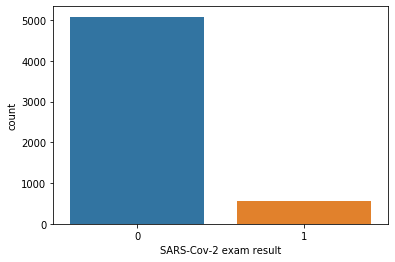

In [18]:
sns.countplot(df['SARS-Cov-2 exam result'])

In [19]:
print("There are {}% target values with 1(Positive)".format(100 * df['SARS-Cov-2 exam result'].value_counts()[1]/df.shape[0]))

There are 9.886605244507441% target values with 1(Positive)


### Checking Missing Values

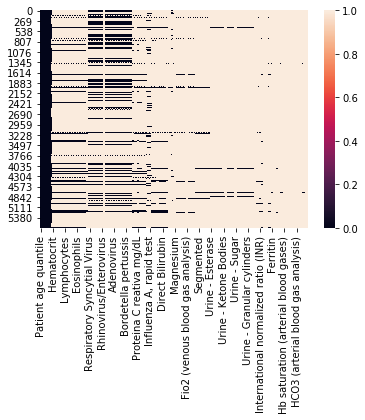

In [20]:
sns.heatmap(df.isnull())

The above graph is here to show that if there are any null values in the above dataset, I have found out that as there are too many columns and they have too many nan values present (Null Values).

In [21]:
df.isnull().sum()

Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 110, dtype: int64

Now to get a more clear picturevfor the above dataset we will be looking at the persentage of missing values in each and every columnns, through this we will do the treatment.

In [22]:
def missing(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))
missing(df)

Patient age quantile SARS-Cov-2 exam result  \
Total                      0                      0   
Percent                    0                      0   
Types                 object                  int64   

        Patient addmited to regular ward (1=yes, 0=no)  \
Total                                                0   
Percent                                              0   
Types                                            int64   

        Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Total                                                    0      
Percent                                                  0      
Types                                                int64      

        Patient addmited to intensive care unit (1=yes, 0=no) Hematocrit  \
Total                                                    0          5041   
Percent                                                  0       89.3161   
Types                                                int64       float64   

        Hemoglobin Platelets Mean platelet volume  Red blood Cells  ...  \
Total         5041      5042                  5045            5042  ...   
Percent    89.3161   89.3338                89.387         89.3338  ...   
Types      float64   float64               float64         float64  ...   

        Hb saturation (arterial blood gases)  \
Total                                   5617   
Percent                              99.5216   
Types                                float64   

        pCO2 (arterial blood gas analysis)  \
Total                                 5617   
Percent                            99.5216   
Types                              float64   

        Base excess (arterial blood gas analysis)  \
Total                                        5617   
Percent                                   99.5216   
Types                                     float64   

        pH (arterial blood gas analysis)  \
Total                               5617   
Percent                          99.5216   
Types                            float64   

        Total CO2 (arterial blood gas analysis)  \
Total                                      5617   
Percent                                 99.5216   
Types                                   float64   

        HCO3 (arterial blood gas analysis) pO2 (arterial blood gas analysis)  \
Total                                 5617                              5617   
Percent                            99.5216                           99.5216   
Types                              float64                           float64   

        Arteiral Fio2 Phosphor ctO2 (arterial blood gas analysis)  
Total            5624     5624                               5617  
Percent       99.6456  99.6456                            99.5216  
Types         float64  float64                            float64  

[3 rows x 110 columns]

In [23]:
# Number of each type of column
df.dtypes.value_counts()

float64    70
object     36
int64       4
dtype: int64

In [24]:
# Number of unique classes in each object column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Patient age quantile           20
Respiratory Syncytial Virus     2
Influenza A                     2
Influenza B                     2
Parainfluenza 1                 2
CoronavirusNL63                 2
Rhinovirus/Enterovirus          2
Coronavirus HKU1                2
Parainfluenza 3                 2
Chlamydophila pneumoniae        2
Adenovirus                      2
Parainfluenza 4                 2
Coronavirus229E                 2
CoronavirusOC43                 2
Inf A H1N1 2009                 2
Bordetella pertussis            2
Metapneumovirus                 2
Parainfluenza 2                 1
Influenza B, rapid test         2
Influenza A, rapid test         2
Strepto A                       3
Urine - Esterase                2
Urine - Aspect                  4
Urine - pH                     11
Urine - Hemoglobin              3
Urine - Bile pigments           2
Urine - Ketone Bodies           2
Urine - Nitrite                 1
Urine - Urobilinogen            2
Urine - Protei

Correlation of the Targeted variables with other attributes:

1. 00-.19 “very weak”
2. 20-.39 “weak”
3. 40-.59 “moderate”
4. 60-.79 “strong”
5. 80-1.0 “very strong”

In [25]:
# correlations with the target variable
correlations = df.corr()['SARS-Cov-2 exam result'].sort_values()

# Displaying correlations:

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 Lipase dosage                         0.191942
Monocytes                             0.197333
ctO2 (arterial blood gas analysis)    0.267457
pO2 (arterial blood gas analysis)     0.312537
pH (arterial blood gas analysis)      0.314820
SARS-Cov-2 exam result                1.000000
Mycoplasma pneumoniae                      NaN
Fio2 (venous blood gas analysis)           NaN
Myeloblasts                                NaN
Urine - Sugar                              NaN
Partial thromboplastin time (PTT)          NaN
Prothrombin time (PT), Activity            NaN
Vitamin B12                                NaN
D-Dimer                                    NaN
Albumin                                    NaN
Name: SARS-Cov-2 exam result, dtype: float64

Most Negative Correlations:
 pCO2 (arterial blood gas analysis)        -0.323977
Arteiral Fio2                             -0.310583
Ionized calcium                           -0.305113
Leukocytes                         

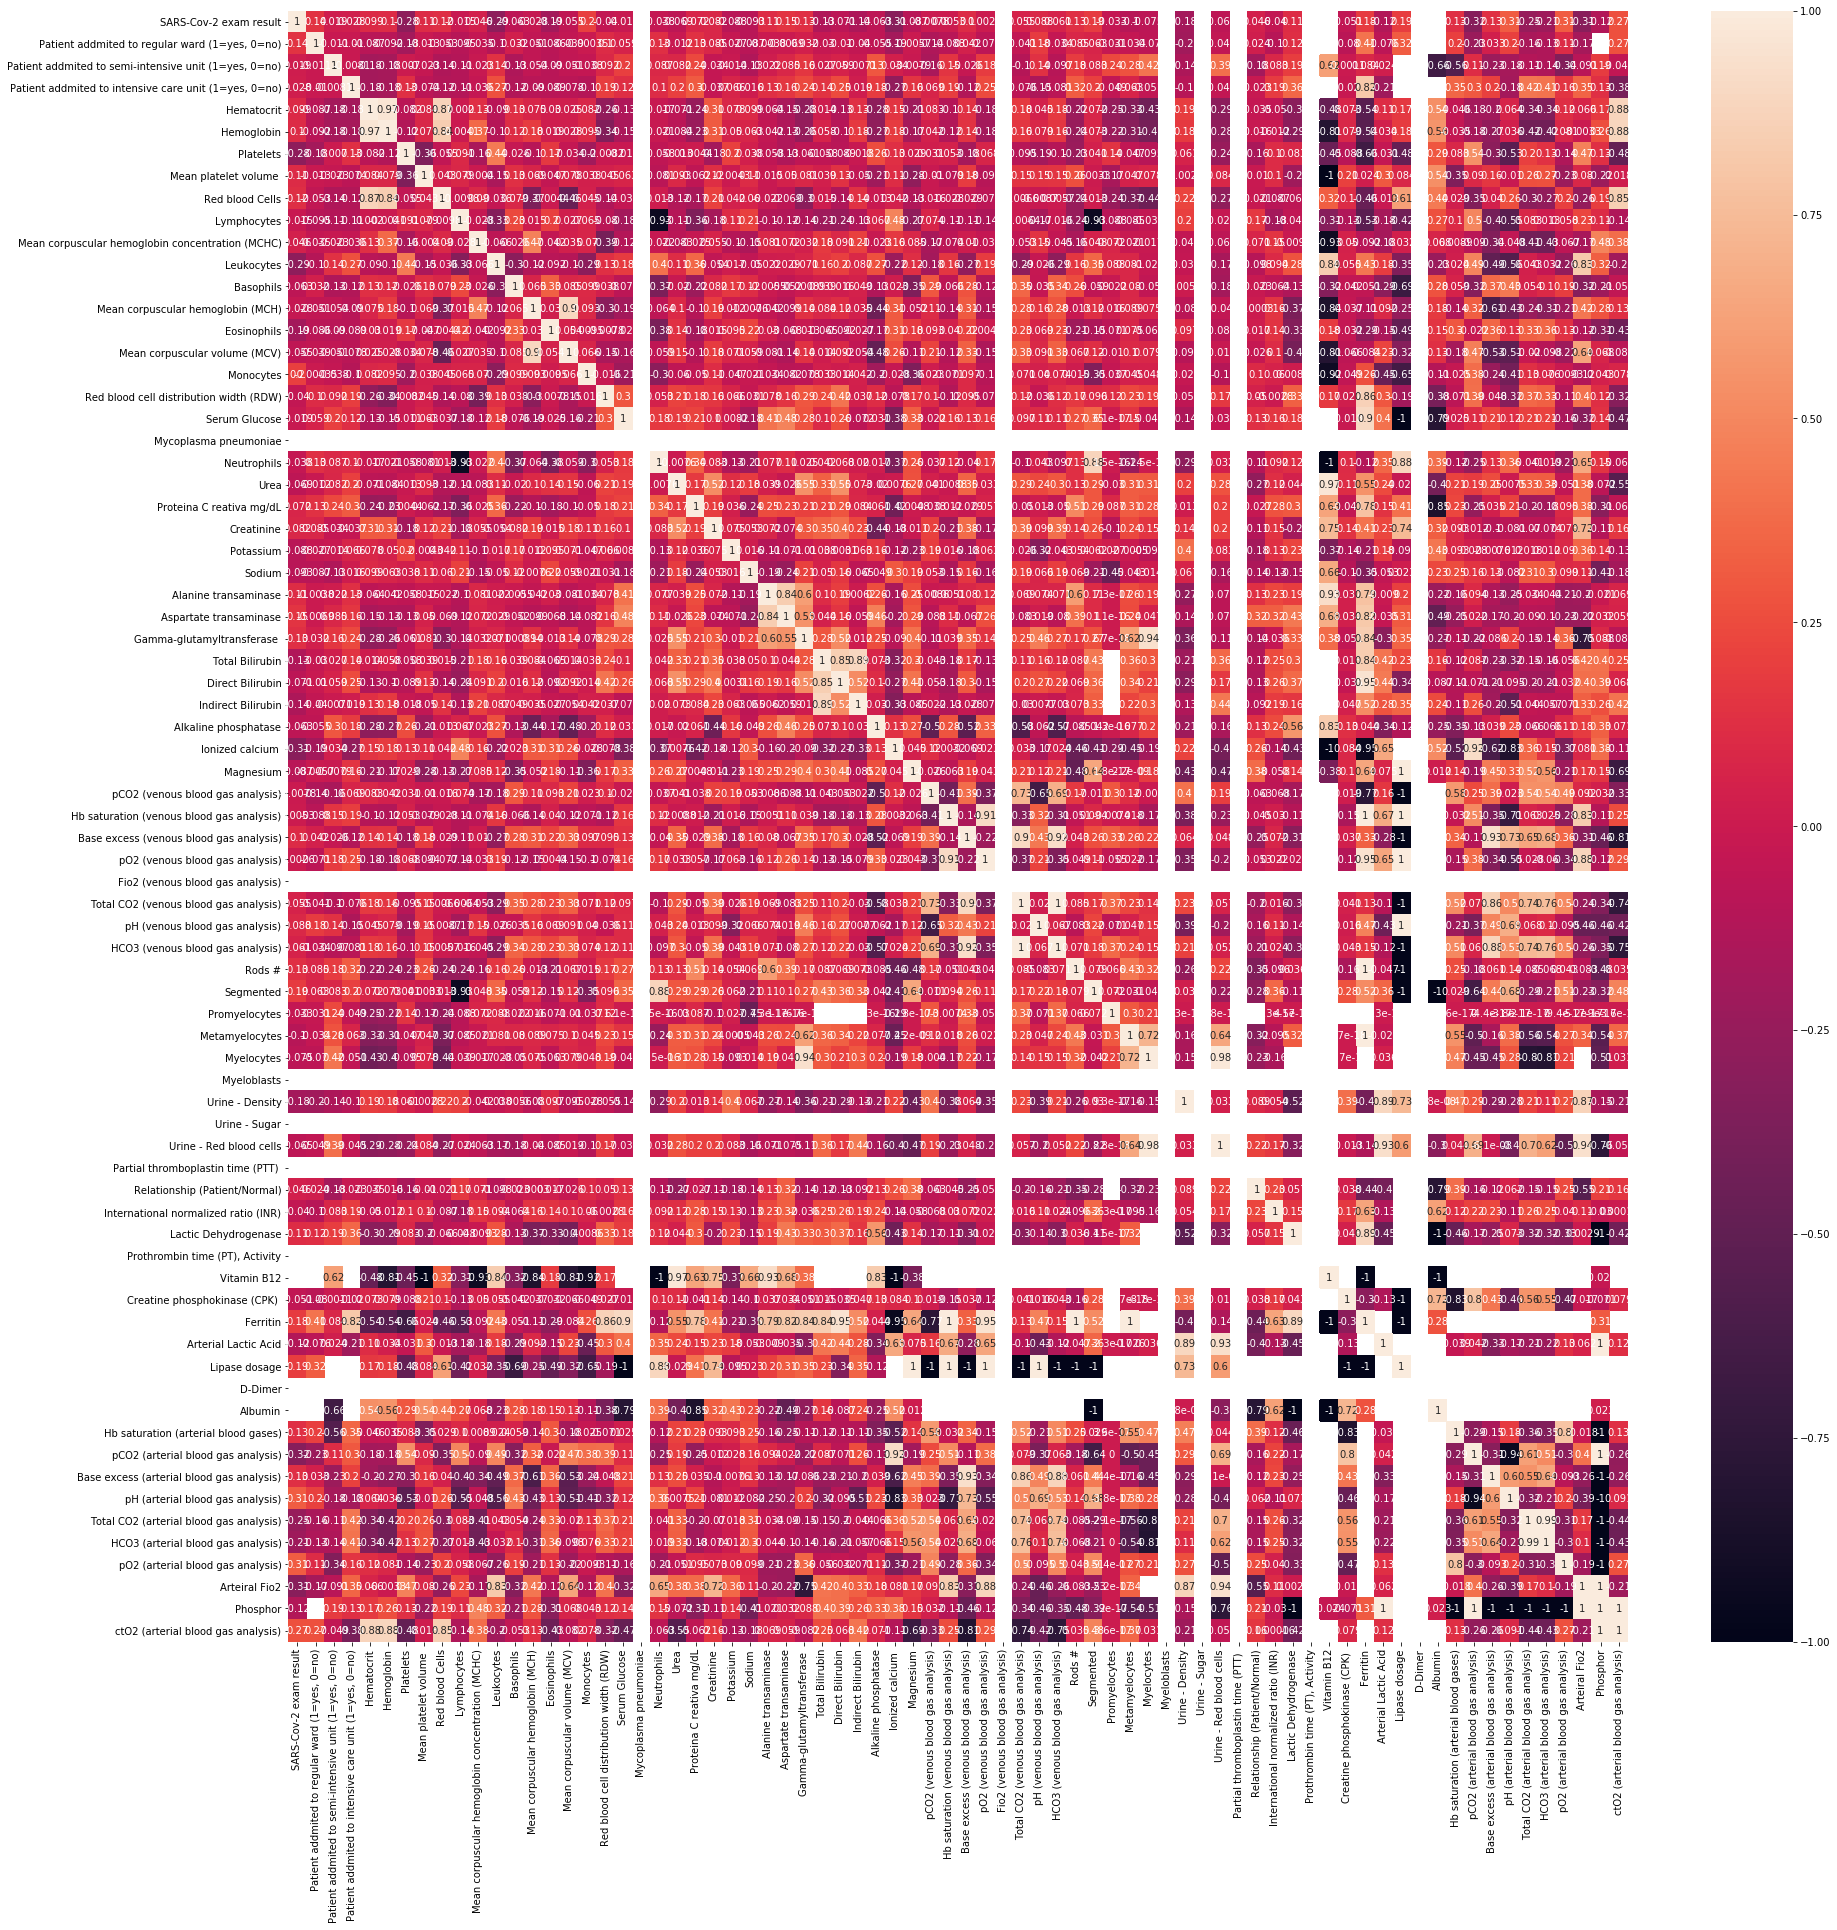

In [26]:
corr_hmap=df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_hmap,annot=True)
plt.show()

With respect to the above and below heatmap it is implied that the heat map is to show the variables are correlating with each other or not . 
Few variables are showing strong negative correlation is as follows: 

'ctO2 (arterial blood gas analysis)','Arteiral Fio2','Albumin','Vitamin B12','Leukocytes','Eosinophils'

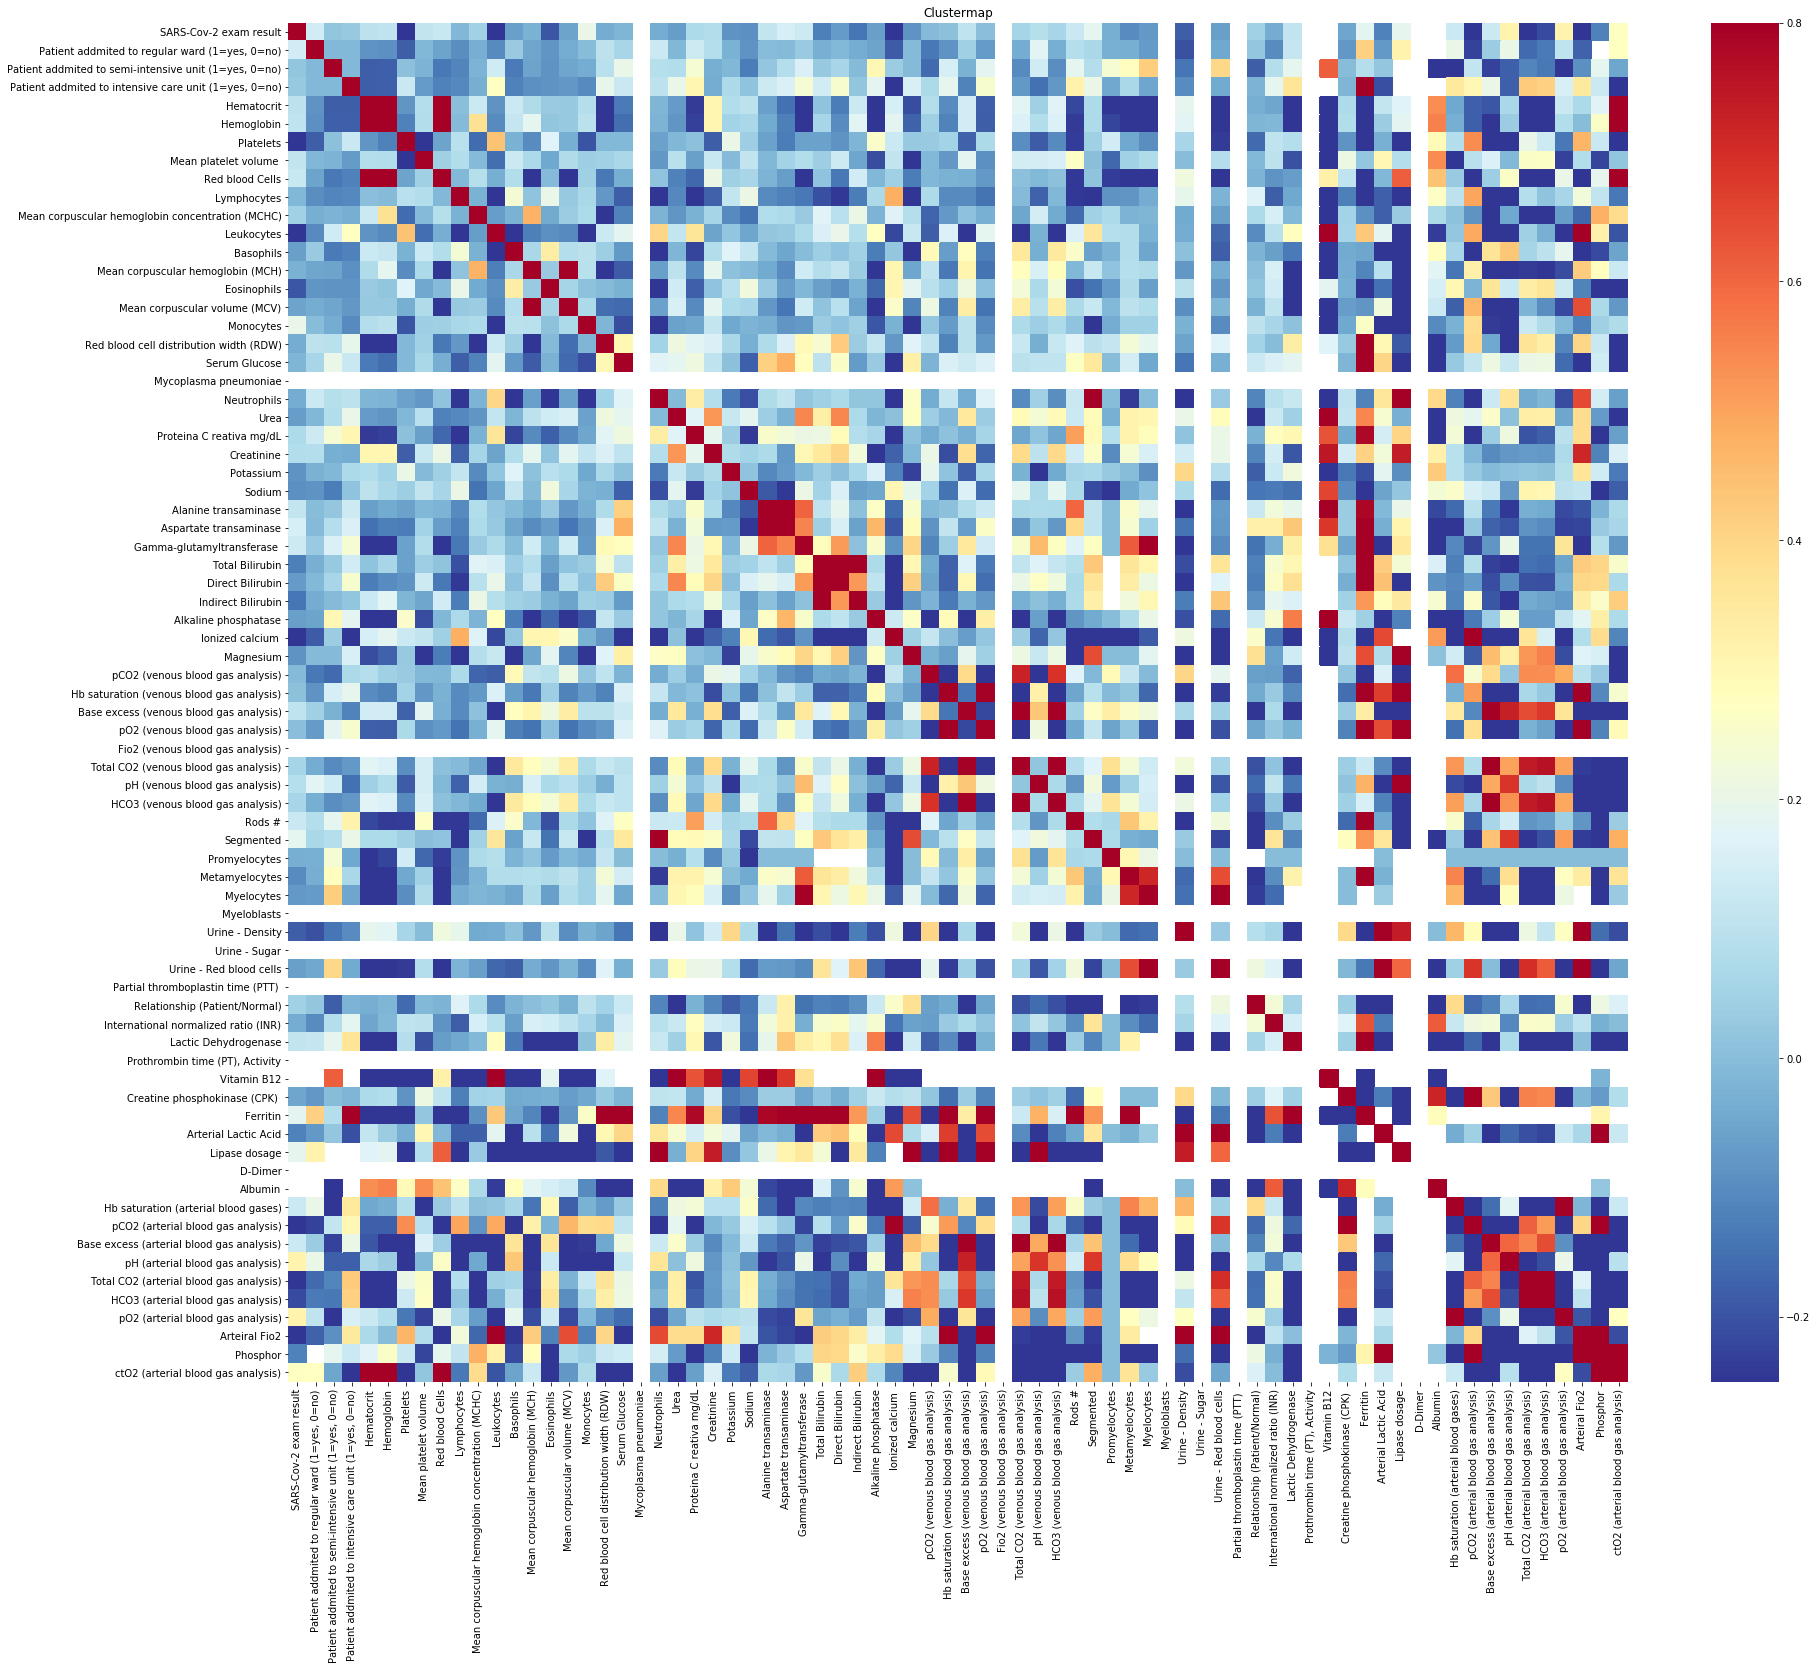

In [27]:
corrs = df.corr()
plt.figure(figsize = (30, 25))
# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = False, vmax = 0.8)
plt.title('Clustermap');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc54dc45d0>,
      dtype=object)

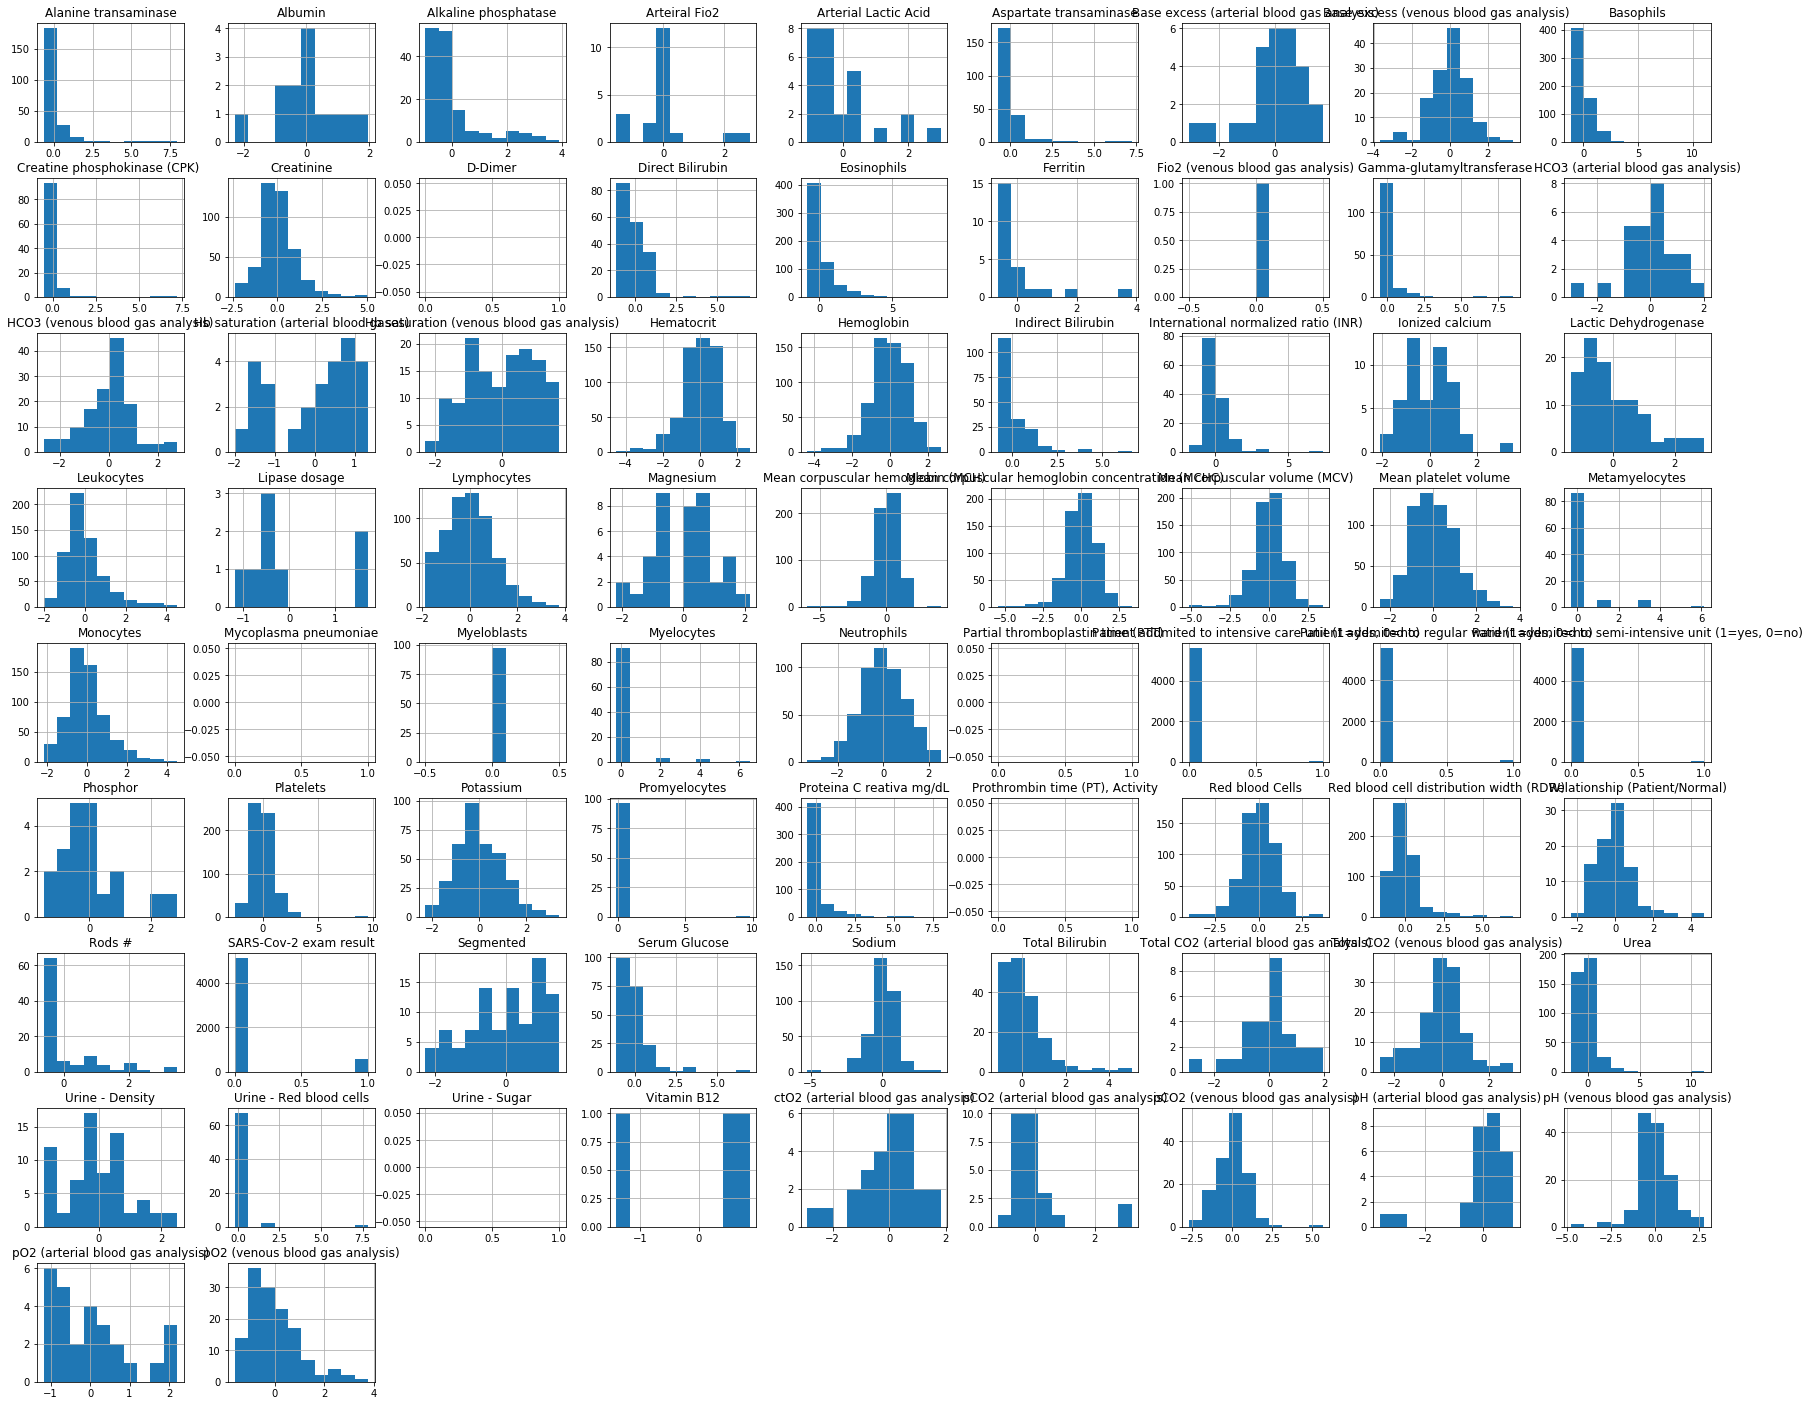

In [28]:
df.hist(figsize=(30,25))

The above histogram shows the count of the patients withrespect to the different attributes: such as we coukd see:-

1. Most of the instances have the phosphor level in between -1 to .5.
2. Maximum level of monocytes are present in the range of -1 to 1.
3. Highest number of instances have potassium level ranging in between -1 to .5
4. Around 95% of the result shows negative result in the targeted variables.

Likewise we could see the details of of the other variables.

In [29]:
#group wise dtypes:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['SARS-Cov-2 exam result',
        'Patient addmited to regular ward (1=yes, 0=no)',
        'Patient addmited to semi-intensive unit (1=yes, 0=no)',
        'Patient addmited to intensive care unit (1=yes, 0=no)'],
       dtype='object'),
 dtype('float64'): Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
        'Red blood Cells', 'Lymphocytes',
        'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
        'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
        'Mean corpuscular volume (MCV)', 'Monocytes',
        'Red blood cell distribution width (RDW)', 'Serum Glucose',
        'Mycoplasma pneumoniae', 'Neutrophils', 'Urea',
        'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium',
        'Alanine transaminase', 'Aspartate transaminase',
        'Gamma-glutamyltransferase ', 'Total Bilirubin', 'Direct Bilirubin',
        'Indirect Bilirubin', 'Alkaline phosphatase', 'Ionized calcium

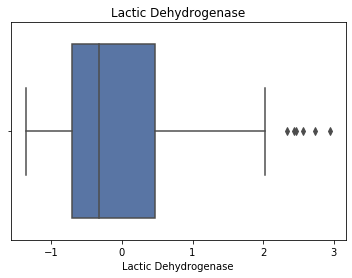

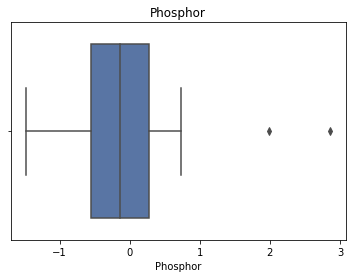

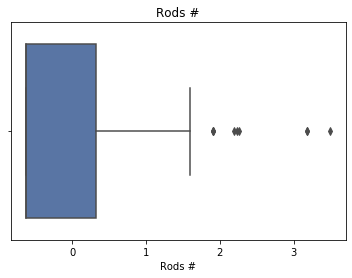

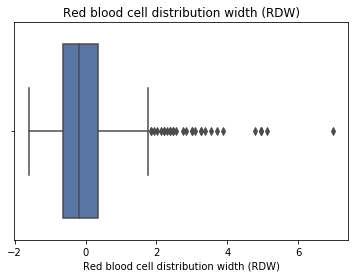

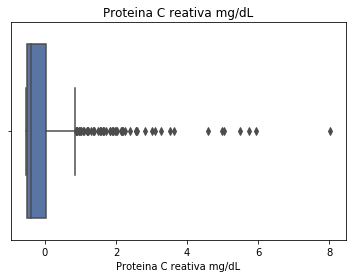

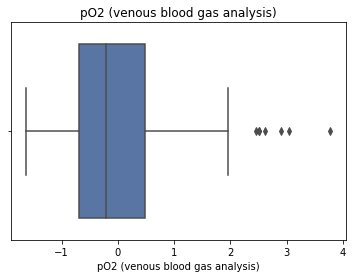

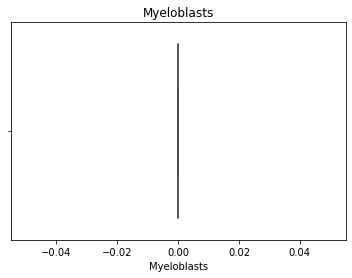

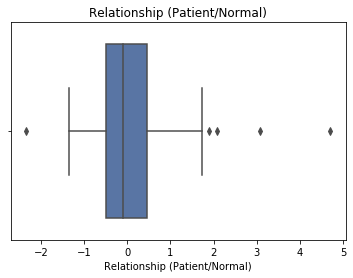

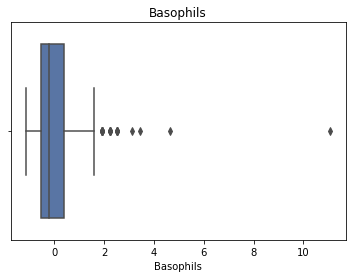

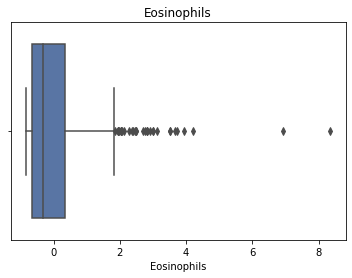

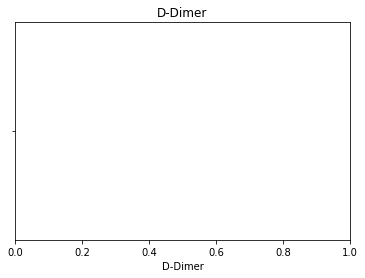

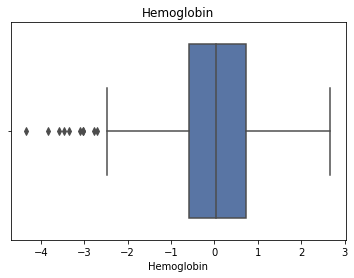

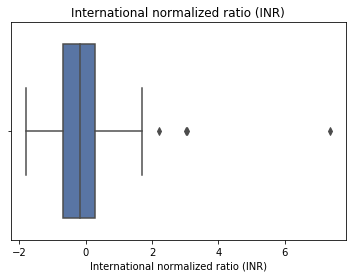

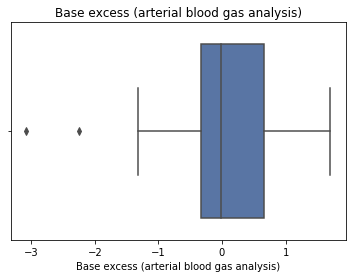

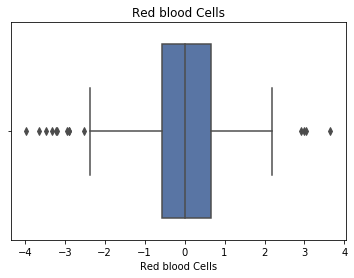

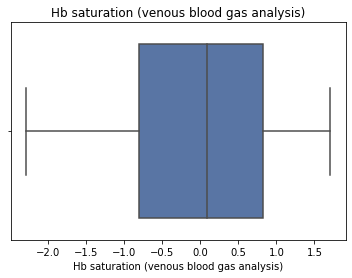

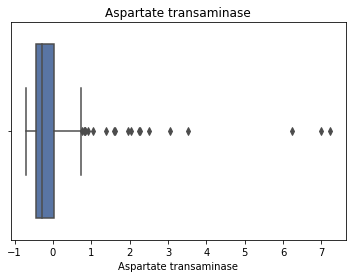

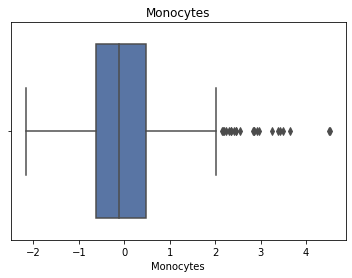

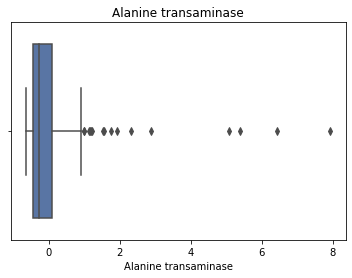

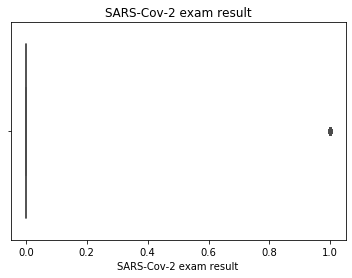

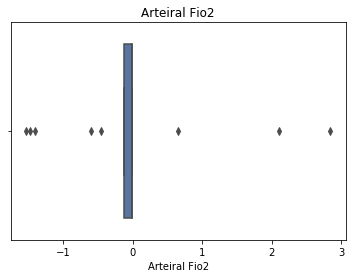

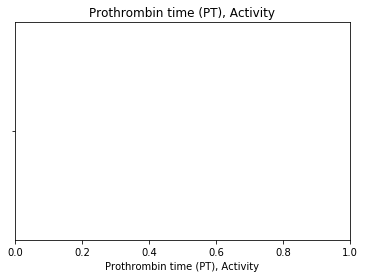

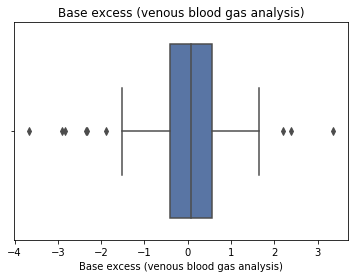

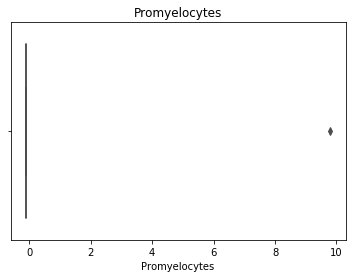

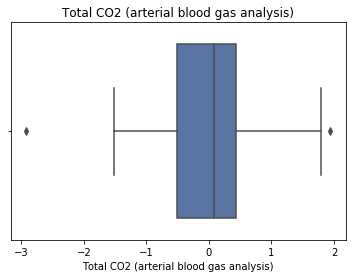

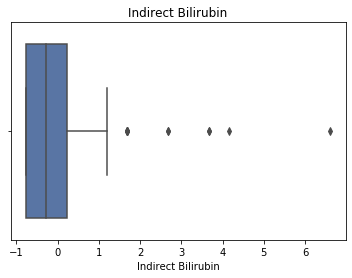

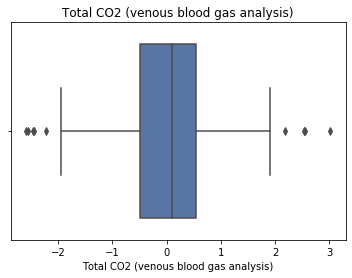

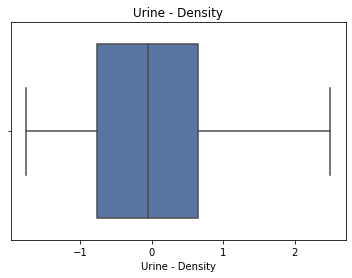

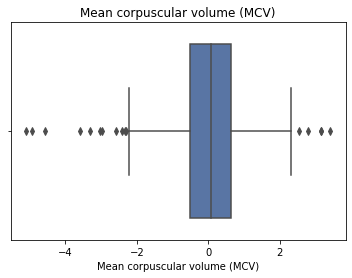

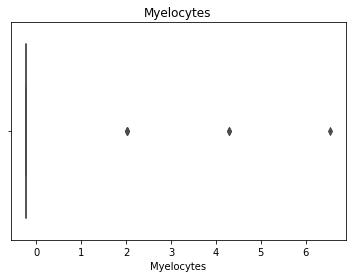

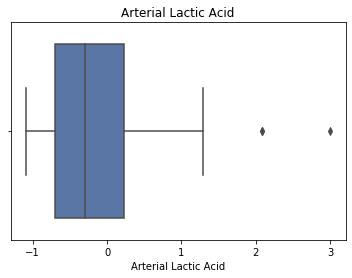

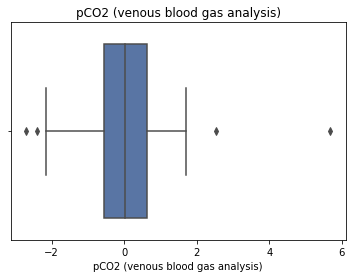

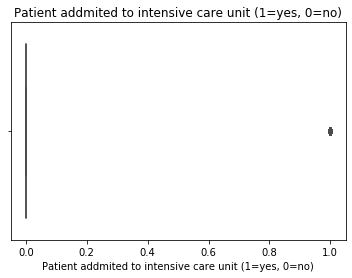

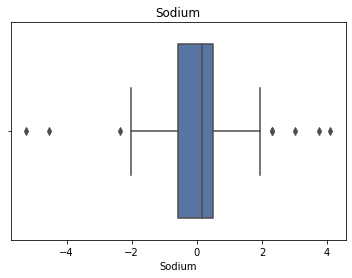

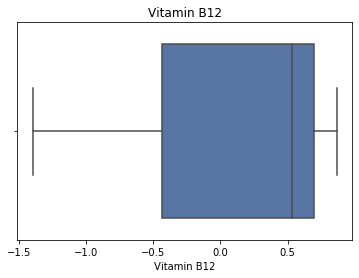

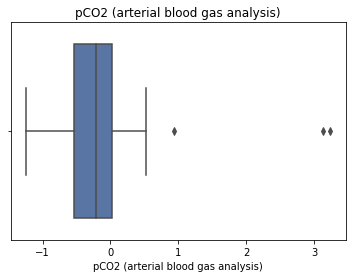

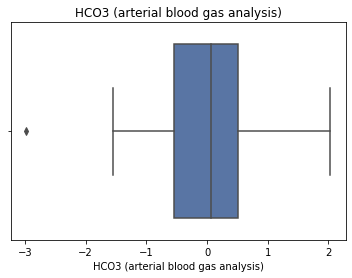

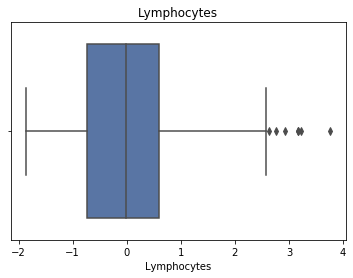

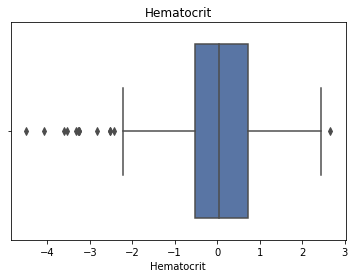

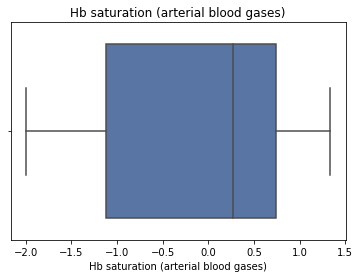

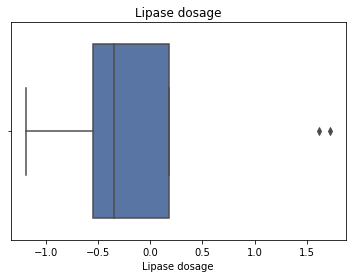

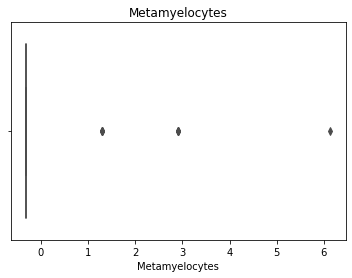

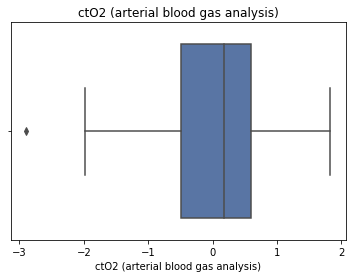

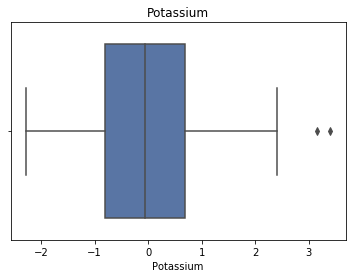

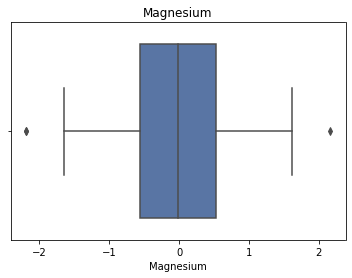

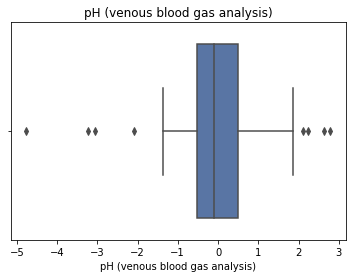

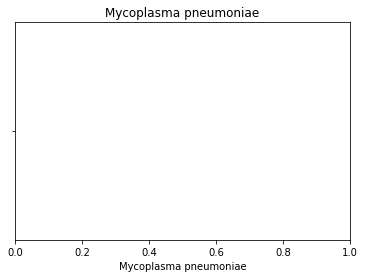

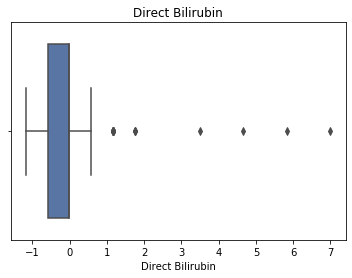

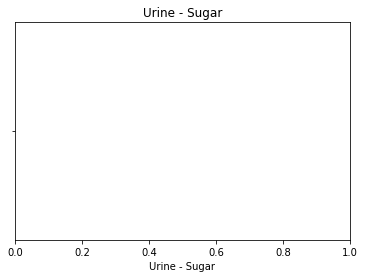

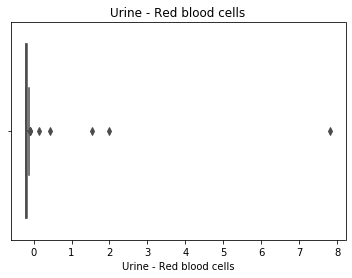

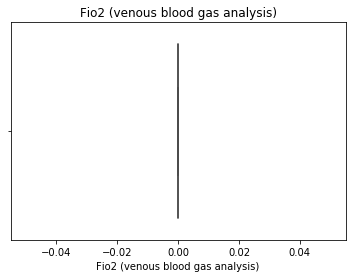

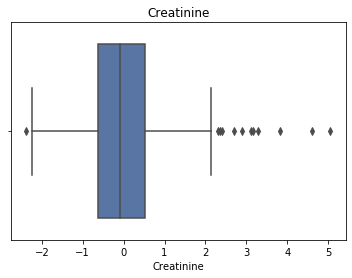

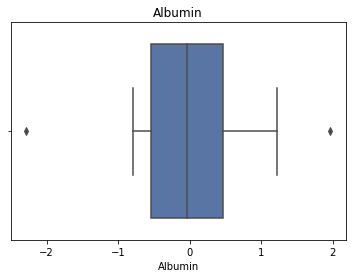

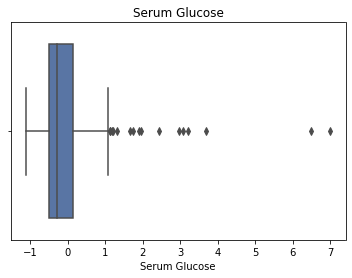

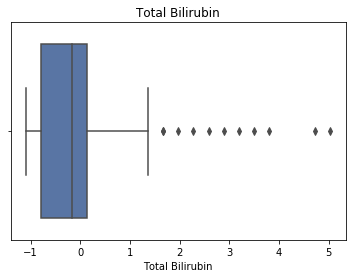

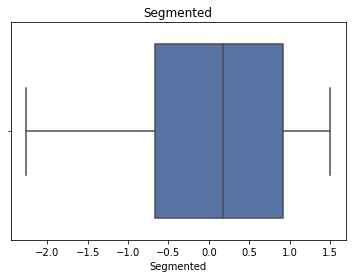

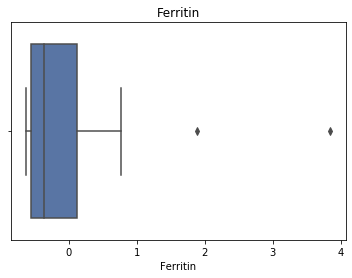

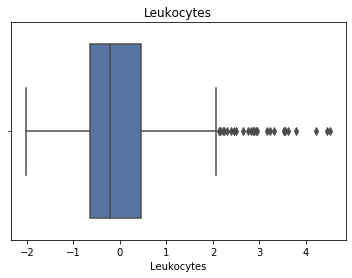

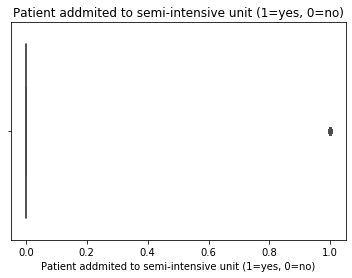

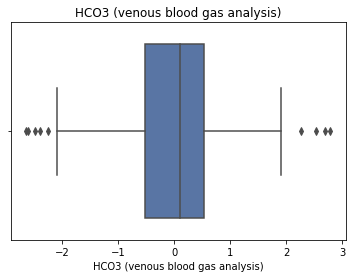

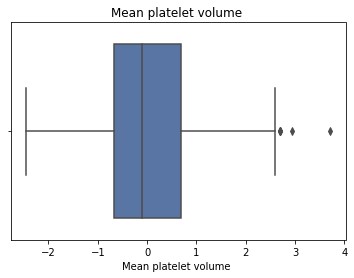

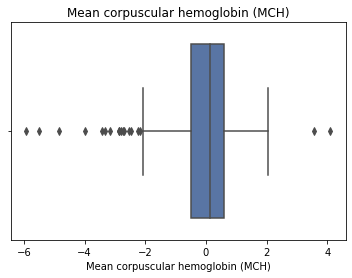

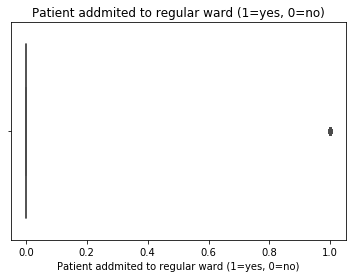

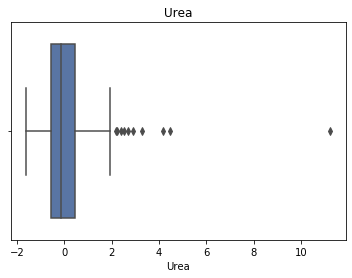

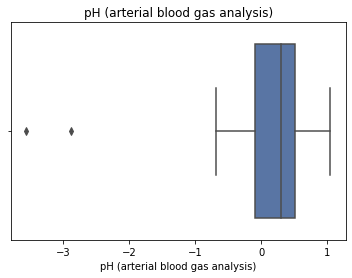

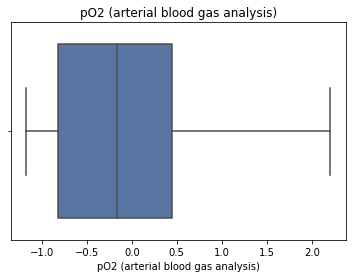

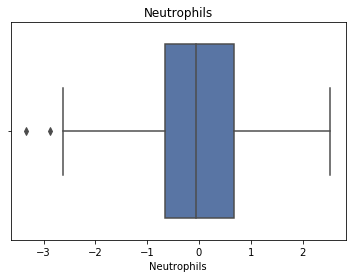

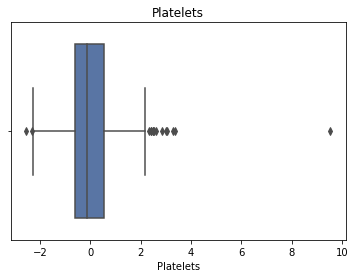

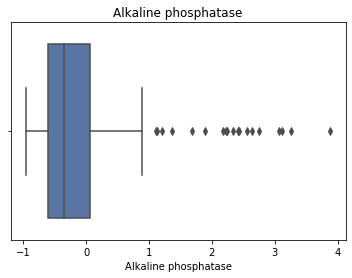

In [30]:
columns={'SARS-Cov-2 exam result',
        'Patient addmited to regular ward (1=yes, 0=no)',
        'Patient addmited to semi-intensive unit (1=yes, 0=no)',
        'Patient addmited to intensive care unit (1=yes, 0=no)','Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
        'Red blood Cells', 'Lymphocytes', 'Leukocytes',
        'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
        'Mean corpuscular volume (MCV)', 'Monocytes',
        'Red blood cell distribution width (RDW)', 'Serum Glucose',
        'Mycoplasma pneumoniae', 'Neutrophils', 'Urea',
        'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium',
        'Alanine transaminase', 'Aspartate transaminase', 'Total Bilirubin', 'Direct Bilirubin',
        'Indirect Bilirubin', 'Alkaline phosphatase',
        'Magnesium', 'pCO2 (venous blood gas analysis)',
        'Hb saturation (venous blood gas analysis)',
        'Base excess (venous blood gas analysis)',
        'pO2 (venous blood gas analysis)', 'Fio2 (venous blood gas analysis)',
        'Total CO2 (venous blood gas analysis)',
        'pH (venous blood gas analysis)', 'HCO3 (venous blood gas analysis)',
        'Rods #', 'Segmented', 'Promyelocytes', 'Metamyelocytes', 'Myelocytes',
        'Myeloblasts', 'Urine - Density', 'Urine - Sugar',
        'Urine - Red blood cells',
        'Relationship (Patient/Normal)', 'International normalized ratio (INR)',
        'Lactic Dehydrogenase', 'Prothrombin time (PT), Activity',
        'Vitamin B12', 'Ferritin',
        'Arterial Lactic Acid', 'Lipase dosage', 'D-Dimer', 'Albumin',
        'Hb saturation (arterial blood gases)',
        'pCO2 (arterial blood gas analysis)',
        'Base excess (arterial blood gas analysis)',
        'pH (arterial blood gas analysis)',
        'Total CO2 (arterial blood gas analysis)',
        'HCO3 (arterial blood gas analysis)',
        'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
        'ctO2 (arterial blood gas analysis)'}
for i in columns:
    plt.figure()
    plt.clf()
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()

The plot box situated above and below are representing the minimum value , maximum value and showing the mean value for the variables. In some of the variables such as:

'Lymphocytes', 'Leukocytes','Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils','Mean corpuscular volume (MCV)', 'Monocytes','Red blood cell distribution width (RDW)', 'Serum Glucose','Mycoplasma pneumoniae', 'Neutrophils', 'Urea','Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium','Alanine transaminase', 'Aspartate transaminase', 'Total Bilirubin', 'Direct Bilirubin', 'Indirect Bilirubin', 'Alkaline phosphatase','Magnesium', 'pCO2 (venous blood gas analysis)' ect...

The graph shows some poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not. If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.

Outliers here are the observations that we find at the abnormal distance from other values.

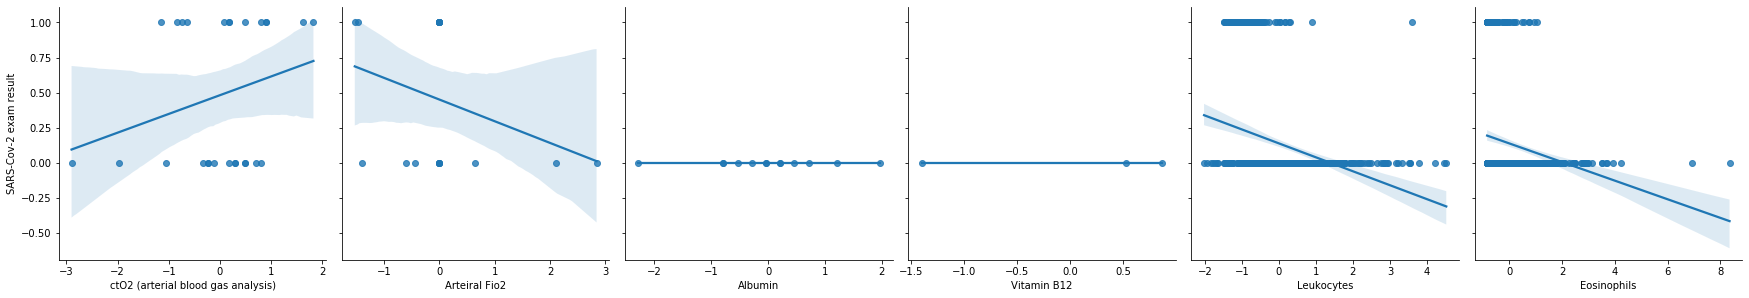

In [31]:
sns.pairplot(df, x_vars=['ctO2 (arterial blood gas analysis)','Arteiral Fio2','Albumin','Vitamin B12','Leukocytes','Eosinophils'], y_vars='SARS-Cov-2 exam result', size=4, aspect=1, kind='reg')

The above graphs shows the attributes which are stongly not correlating with the targeted variables SARS-Cov-2 exam result.

# TASK 1

In [32]:
df1=pd.DataFrame(data=df)
df1.tail()

Patient age quantile  SARS-Cov-2 exam result  \
5639                    3                       1   
5640                   17                       0   
5641                    4                       0   
5642                   10                       0   
5643                   19                       1   

      Patient addmited to regular ward (1=yes, 0=no)  \
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
5639         NaN        NaN                    NaN              NaN  ...   
5640         NaN        NaN                    NaN              NaN  ...   
5641         NaN        NaN                    NaN              NaN  ...   
5642         NaN        NaN                    NaN              NaN  ...   
5643    0.541564  -0.906829              -0.325903         0.578024  ...   

      Hb saturation (arterial blood gases)  \
5639                                   NaN   
5640                                   NaN   
5641                                   NaN   
5642                                   NaN   
5643                                   NaN   

      pCO2 (arterial blood gas analysis)  \
5639                                 NaN   
5640                                 NaN   
5641                                 NaN   
5642                                 NaN   
5643                                 NaN   

      Base excess (arterial blood gas analysis)  \
5639                                        NaN   
5640                                        NaN   
5641                                        NaN   
5642                                        NaN   
5643                                        NaN   

      pH (arterial blood gas analysis)  \
5639                               NaN   
5640                               NaN   
5641                               NaN   
5642                               NaN   
5643                               NaN   

      Total CO2 (arterial blood gas analysis)  \
5639                                      NaN   
5640                                      NaN   
5641                                      NaN   
5642                                      NaN   
5643                                      NaN   

      HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
5639                                 NaN                                NaN   
5640                                 NaN                                NaN   
5641                                 NaN                                NaN   
5642                                 NaN                                NaN   
5643                                 NaN                                NaN   

      Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
5639            NaN       NaN                                 NaN  
5640            NaN       NaN                         

### LabelEncoder

In [33]:
from sklearn.preprocessing import LabelEncoder

for c in df1.columns:
    if df1[c].dtype=='float16' or  df1[c].dtype=='float32' or  df1[c].dtype=='float64':
        df1[c].fillna(df1[c].mean())

#fill in -999 for categoricals
df1 = df1.fillna(-999)
# Label Encoding
for f in df1.columns:
    if df1[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df1[f].values))
        df1[f] = lbl.transform(list(df1[f].values)) 

In [34]:
df1.head()

Patient age quantile  SARS-Cov-2 exam result  \
0                     5                       0   
1                     9                       0   
2                    18                       0   
3                    15                       0   
4                     7                       0   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0     -999.000000   
1                                                  0        0.236515   
2                                                  0     -999.000000   
3                                                  0     -999.000000   
4                                                  0     -999.000000   

   Hemoglobin   Platelets  Mean platelet volume   Red blood Cells  ...  \
0  -999.00000 -999.000000            -999.000000      -999.000000  ...   
1    -0.02234   -0.517413               0.010677         0.102004  ...   
2  -999.00000 -999.000000            -999.000000      -999.000000  ...   
3  -999.00000 -999.000000            -999.000000      -999.000000  ...   
4  -999.00000 -999.000000            -999.000000      -999.000000  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                -999.0                              -999.0   
1                                -999.0                              -999.0   
2                                -999.0                              -999.0   
3                                -999.0                              -999.0   
4                                -999.0                              -999.0   

   Base excess (arterial blood gas analysis)  \
0                                     -999.0   
1                                     -999.0   
2                                     -999.0   
3                                     -999.0   
4                                     -999.0   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                            -999.0                                   -999.0   
1                            -999.0                                   -999.0   
2                            -999.0                                   -999.0   
3                            -999.0                                   -999.0   
4                            -999.0                                   -999.0   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                              -999.0                             -999.0   
1                              -999.0                             -999.0   
2                              -999.0                             -999.0   
3                              -999.0                             -999.0   
4                              -999.0                             -999.0   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0         -999.0    -999.0                              -999.0  
1         -999.0    -999.0                              -999.0  
2         -999.0    -999.0                              -999.0  
3         -999.0    -999.0                              -999.0  
4         -999.0    -999.0                              -999.0  

[5 rows x 110 columns]

In [35]:
# Threshold for removing correlated variables
threshold = 0.92
# Absolute value correlation matrix
corr_matrix = df1.corr().abs()
corr_matrix.head()

Patient age quantile  \
Patient age quantile                                            1.000000   
SARS-Cov-2 exam result                                          0.058313   
Patient addmited to regular ward (1=yes, 0=no)                  0.033767   
Patient addmited to semi-intensive unit (1=yes,...              0.058009   
Patient addmited to intensive care unit (1=yes,...              0.086537   

                                                    SARS-Cov-2 exam result  \
Patient age quantile                                              0.058313   
SARS-Cov-2 exam result                                            1.000000   
Patient addmited to regular ward (1=yes, 0=no)                    0.142437   
Patient addmited to semi-intensive unit (1=yes,...                0.019364   
Patient addmited to intensive care unit (1=yes,...                0.027586   

                                                    Patient addmited to regular ward (1=yes, 0=no)  \
Patient age quantile                                                                      0.033767   
SARS-Cov-2 exam result                                                                    0.142437   
Patient addmited to regular ward (1=yes, 0=no)                                            1.000000   
Patient addmited to semi-intensive unit (1=yes,...                                        0.011264   
Patient addmited to intensive care unit (1=yes,...                                        0.010192   

                                                    Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient age quantile                                                                         0.058009       
SARS-Cov-2 exam result                                                                       0.019364       
Patient addmited to regular ward (1=yes, 0=no)                                               0.011264       
Patient addmited to semi-intensive unit (1=yes,...                                           1.000000       
Patient addmited to intensive care unit (1=yes,...                                           0.008087       

                                                    Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient age quantile                                                                         0.086537       
SARS-Cov-2 exam result                                                                       0.027586       
Patient addmited to regular ward (1=yes, 0=no)                                               0.010192       
Patient addmited to semi-intensive unit (1=yes,...                                           0.008087       
Patient addmited to intensive care unit (1=yes,...                                           1.000000       

                                                    Hematocrit  Hemoglobin  \
Patient age quantile                                  0.014830    0.014829   
SARS-Cov-2 exam result                                0.044974    0.044976   
Patient addmited to regular ward (1=yes, 0=no)        0.241889    0.241885   
Patient addmited to semi-intensive unit (1=yes,...    0.224213    0.224218   
Patient addmited to intensive care unit (1=yes,...    0.166123    0.166127   

                                                    Platelets  \
Patient age quantile                                 0.015112   
SARS-Cov-2 exam result                               0.045045   
Patient addmited to regular ward (1=yes, 0=no)       0.242051   
Patient addmited to semi-intensive unit (1=yes,...   0.224609   
Patient addmited to intensive care unit (1=yes,...   0.166564   

                                                    Mean platelet volume   \
Patient age quantile                                             0.015119   
SARS-Cov-2 exam result                                           0.042017   
Patient addmited to regular ward (1=yes, 0=no)                   0.238041   
Patient addmited to semi-intensive 

In [36]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

Patient age quantile  \
Patient age quantile                                                 NaN   
SARS-Cov-2 exam result                                               NaN   
Patient addmited to regular ward (1=yes, 0=no)                       NaN   
Patient addmited to semi-intensive unit (1=yes,...                   NaN   
Patient addmited to intensive care unit (1=yes,...                   NaN   

                                                    SARS-Cov-2 exam result  \
Patient age quantile                                              0.058313   
SARS-Cov-2 exam result                                                 NaN   
Patient addmited to regular ward (1=yes, 0=no)                         NaN   
Patient addmited to semi-intensive unit (1=yes,...                     NaN   
Patient addmited to intensive care unit (1=yes,...                     NaN   

                                                    Patient addmited to regular ward (1=yes, 0=no)  \
Patient age quantile                                                                      0.033767   
SARS-Cov-2 exam result                                                                    0.142437   
Patient addmited to regular ward (1=yes, 0=no)                                                 NaN   
Patient addmited to semi-intensive unit (1=yes,...                                             NaN   
Patient addmited to intensive care unit (1=yes,...                                             NaN   

                                                    Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient age quantile                                                                         0.058009       
SARS-Cov-2 exam result                                                                       0.019364       
Patient addmited to regular ward (1=yes, 0=no)                                               0.011264       
Patient addmited to semi-intensive unit (1=yes,...                                                NaN       
Patient addmited to intensive care unit (1=yes,...                                                NaN       

                                                    Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient age quantile                                                                         0.086537       
SARS-Cov-2 exam result                                                                       0.027586       
Patient addmited to regular ward (1=yes, 0=no)                                               0.010192       
Patient addmited to semi-intensive unit (1=yes,...                                           0.008087       
Patient addmited to intensive care unit (1=yes,...                                                NaN       

                                                    Hematocrit  Hemoglobin  \
Patient age quantile                                  0.014830    0.014829   
SARS-Cov-2 exam result                                0.044974    0.044976   
Patient addmited to regular ward (1=yes, 0=no)        0.241889    0.241885   
Patient addmited to semi-intensive unit (1=yes,...    0.224213    0.224218   
Patient addmited to intensive care unit (1=yes,...    0.166123    0.166127   

                                                    Platelets  \
Patient age quantile                                 0.015112   
SARS-Cov-2 exam result                               0.045045   
Patient addmited to regular ward (1=yes, 0=no)       0.242051   
Patient addmited to semi-intensive unit (1=yes,...   0.224609   
Patient addmited to intensive care unit (1=yes,...   0.166564   

                                                    Mean platelet volume   \
Patient age quantile                                             0.015119   
SARS-Cov-2 exam result                                           0.042017   
Patient addmited to regular ward (1=yes, 0=no)                   0.238041   
Patient addmited to semi-intensive 

In [37]:
# Select columns with correlations above threshold

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
df1 = df1.drop(columns = to_drop)
print('Data shape: ', df1.shape)
print('Size of the data', df1.shape)

There are 64 columns to remove.
Data shape:  (5644, 46)
Size of the data (5644, 46)


In [38]:
# Dataset missing values (in percent)
df1_missing = (df1.isnull().sum() / len(df1)).sort_values(ascending = False)
df1_missing.head()

Phosphor                            0.0
Proteina C reativa mg/dL            0.0
pCO2 (venous blood gas analysis)    0.0
Magnesium                           0.0
Strepto A                           0.0
dtype: float64

In [39]:
df1.shape

(5644, 46)

In [40]:
data_frame_list = [df1]
for df1 in data_frame_list:
    df1.ffill(inplace=True)

In [41]:
data_frame_list = [df1]
for df1 in data_frame_list:
    df1.bfill(inplace=True)

### Changing Column:

Bringing SARS-Cov-2 exam result column at the 1st column, in-order to ease of the calculation.

In [42]:
mid = df1['SARS-Cov-2 exam result']
df1.drop(labels=['SARS-Cov-2 exam result'], axis=1, inplace = True)
df1.insert(0, 'SARS-Cov-2 exam result', mid)
df1.head()

SARS-Cov-2 exam result  Patient age quantile  \
0                       0                     5   
1                       0                     9   
2                       0                    18   
3                       0                    15   
4                       0                     7   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0     -999.000000   
1                                                  0        0.236515   
2                                                  0     -999.000000   
3                                                  0     -999.000000   
4                                                  0     -999.000000   

   Serum Glucose  Respiratory Syncytial Virus  Mycoplasma pneumoniae  \
0    -999.000000                            0                 -999.0   
1      -0.140648                            2                 -999.0   
2    -999.000000                            0                 -999.0   
3    -999.000000                            0                 -999.0   
4    -999.000000                            2                 -999.0   

   Neutrophils  ...  Prothrombin time (PT), Activity  Vitamin B12  \
0  -999.000000  ...                           -999.0       -999.0   
1    -0.619086  ...                           -999.0       -999.0   
2  -999.000000  ...                           -999.0       -999.0   
3  -999.000000  ...                           -999.0       -999.0   
4  -999.000000  ...                           -999.0       -999.0   

   Creatine phosphokinase (CPK)   Ferritin  Arterial Lactic Acid  \
0                         -999.0    -999.0                -999.0   
1                         -999.0    -999.0                -999.0   
2                         -999.0    -999.0                -999.0   
3                         -999.0    -999.0                -999.0   
4                         -999.0    -999.0                -999.0   

   Lipase dosage  D-Dimer  Albumin  Arteiral Fio2  Phosphor  
0         -999.0   -999.0   -999.0         -999.0    -999.0  
1         -999.0   -999.0   -999.0         -999.0    -999.0  
2         -999.0   -999.0   -999.0         -999.0    -999.0  
3         -999.0   -999.0   -999.0         -999.0    -999.0  
4         -999.0   -999.0   -999.0         -999.0    -999.0  

[5 rows x 46 columns]

### Assigning X AND Y Variables:

In [43]:
x=df1.iloc[:,1:46]
x.shape
x.head(10)

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
0                     5                                               0   
1                     9                                               0   
2                    18                                               0   
3                    15                                               0   
4                     7                                               0   
5                    19                                               0   
6                     5                                               0   
7                     8                                               0   
8                     1                                               0   
9                     9                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       
5                                                  0       
6                                                  0       
7                                                  0       
8                                                  1       
9                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0     -999.000000   
1                                                  0        0.236515   
2                                                  0     -999.000000   
3                                                  0     -999.000000   
4                                                  0     -999.000000   
5                                                  0     -999.000000   
6                                                  0     -999.000000   
7                                                  0     -999.000000   
8                                                  0       -1.571682   
9                                                  0     -999.000000   

   Serum Glucose  Respiratory Syncytial Virus  Mycoplasma pneumoniae  \
0    -999.000000                            0                 -999.0   
1      -0.140648                            2                 -999.0   
2    -999.000000                            0                 -999.0   
3    -999.000000                            0                 -999.0   
4    -999.000000                            2                 -999.0   
5    -999.000000                            0                 -999.0   
6    -999.000000                            0                 -999.0   
7    -999.000000                            0                 -999.0   
8      -0.413208                            2                 -999.0   
9    -999.000000                            2                 -999.0   

   Neutrophils        Urea  ...  Prothrombin time (PT), Activity  Vitamin B12  \
0  -999.000000 -999.000000  ...                           -999.0       -999.0   
1    -0.619086    1.198059  ...                           -999.0       -999.0   
2  -999.000000 -999.000000  ...                           -999.0       -999.0   
3  -999.000000 -999.000000  ...                           -999.0       -999.0   
4  -999.000000 -999.000000  ...                           -999.0       -999.0   
5  -999.000000 -999.000000  ...                           -999.0       -999.0   
6  -999.000000 -999.000000  ...                           -999.0       -999.0   
7  -999.000000 -999.000000  ...                           -999.0       -999.0   
8    -0.127395   -0.067309  ...                           -999.0       -999.0   
9  -999.000000 -999.000000  ...                           -999.0       -999.0   

   Creatine phosphokinase (CPK)   Ferr

In [44]:
y=df1.iloc[:,0:1]
y.shape
y

SARS-Cov-2 exam result
0                          0
1                          0
2                          0
3                          0
4                          0
...                      ...
5639                       1
5640                       0
5641                       0
5642                       0
5643                       1

[5644 rows x 1 columns]

### Standard Scaler:
To bring all the values at the same scale

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_scaler = scaler.transform(x)
x = pd.DataFrame(df1_scaler)
x.head(10)

0         1          2         3         4         5         6    7   \
0 -0.800529 -0.119146  -0.094542 -0.085542 -0.345860 -0.195610 -0.558285  0.0   
1 -0.108113 -0.119146  -0.094542 -0.085542  2.892108  5.111453  1.814426  0.0   
2  1.449821 -0.119146  -0.094542 -0.085542 -0.345860 -0.195610 -0.558285  0.0   
3  0.930510 -0.119146  -0.094542 -0.085542 -0.345860 -0.195610 -0.558285  0.0   
4 -0.454321 -0.119146  -0.094542 -0.085542 -0.345860 -0.195610  1.814426  0.0   
5  1.622925 -0.119146  -0.094542 -0.085542 -0.345860 -0.195610 -0.558285  0.0   
6 -0.800529 -0.119146  -0.094542 -0.085542 -0.345860 -0.195610 -0.558285  0.0   
7 -0.281217 -0.119146  -0.094542 -0.085542 -0.345860 -0.195610 -0.558285  0.0   
8 -1.492944 -0.119146  10.577334 -0.085542  2.886249  5.110005  1.814426  0.0   
9 -0.108113 -0.119146  -0.094542 -0.085542 -0.345860 -0.195610  1.814426  0.0   

         8         9   ...   35        36        37        38        39  \
0 -0.316197 -0.275068  ...  0.0 -0.023061 -0.137013 -0.063967 -0.069331   
1  3.160428  3.640155  ...  0.0 -0.023061 -0.137013 -0.063967 -0.069331   
2 -0.316197 -0.275068  ...  0.0 -0.023061 -0.137013 -0.063967 -0.069331   
3 -0.316197 -0.275068  ...  0.0 -0.023061 -0.137013 -0.063967 -0.069331   
4 -0.316197 -0.275068  ...  0.0 -0.023061 -0.137013 -0.063967 -0.069331   
5 -0.316197 -0.275068  ...  0.0 -0.023061 -0.137013 -0.063967 -0.069331   
6 -0.316197 -0.275068  ...  0.0 -0.023061 -0.137013 -0.063967 -0.069331   
7 -0.316197 -0.275068  ...  0.0 -0.023061 -0.137013 -0.063967 -0.069331   
8  3.162140  3.635202  ...  0.0 -0.023061  7.296580 -0.063967 -0.069331   
9 -0.316197 -0.275068  ...  0.0 -0.023061 -0.137013 -0.063967 -0.069331   

         40   41        42        43         44  
0 -0.037676  0.0 -0.048048 -0.059634  -0.059634  
1 -0.037676  0.0 -0.048048 -0.059634  -0.059634  
2 -0.037676  0.0 -0.048048 -0.059634  -0.059634  
3 -0.037676  0.0 -0.048048 -0.059634  -0.059634  
4 -0.037676  0.0 -0.048048 -0.059634  -0.059634  
5 -0.037676  0.0 -0.048048 -0.059634  -0.059634  
6 -0.037676  0.0 -0.048048 -0.059634  -0.059634  
7 -0.037676  0.0 -0.048048 -0.059634  -0.059634  
8 -0.037676  0.0 -0.048048 -0.059634  16.781314  
9 -0.037676  0.0 -0.048048 -0.059634  -0.059634  

[10 rows x 45 columns]

# Model Testing:
### Logistic Regression
### Gaussian NB
### SVC
### Decision Tree Classifier
### KNeighbors Classifier

In [46]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [47]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(4515, 45) (1129, 45)
(4515, 1) (1129, 1)


In [48]:
from sklearn.svm import SVC
LOR=LogisticRegression()
GNB=GaussianNB()
SVC=SVC()
DTC=DecisionTreeClassifier(random_state=10)
KNN=KNeighborsClassifier()

In [49]:
models= []
models.append(('LogisticRegression',LOR))
models.append(('GaussianNB',GNB))
models.append(('SVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KNeighborsClassifie',KNN))

**************** LogisticRegression ****************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY SCORE IS =  0.8990256864481843


CROSS_VAL_SCORE =  0.8972346701813846


ROC_AUC_SCORE =  0.5069620030903216


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.90      1.00      0.95      1017
           1       0.33      0.02      0.03       112

    accuracy                           0.90      1129
   macro avg       0.62      0.51      0.49      1129
weighted avg       0.85      0.90      0.86      1129



CONFUSION MATRIX [[1013    4]
 [ 110    2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


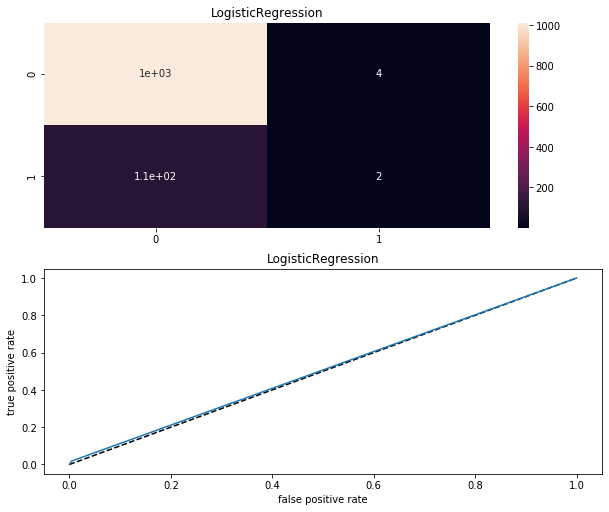




**************** GaussianNB ****************


GaussianNB(priors=None, var_smoothing=1e-09)


ACCURACY SCORE IS =  0.10717449069973428


CROSS_VAL_SCORE =  0.11409652921609237


ROC_AUC_SCORE =  0.504424778761062


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       1.00      0.01      0.02      1017
           1       0.10      1.00      0.18       112

    accuracy                           0.11      1129
   macro avg       0.55      0.50      0.10      1129
weighted avg       0.91      0.11      0.03      1129



CONFUSION MATRIX [[   9 1008]
 [   0  112]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


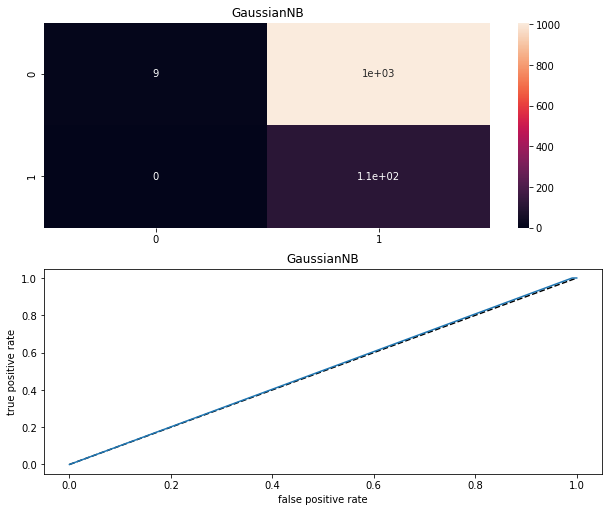




**************** SVC ****************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


ACCURACY SCORE IS =  0.9025686448184234


CROSS_VAL_SCORE =  0.9007792004016821


ROC_AUC_SCORE =  0.5089285714285714


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.90      1.00      0.95      1017
           1       1.00      0.02      0.04       112

    accuracy                           0.90      1129
   macro avg       0.95      0.51      0.49      1129
weighted avg       0.91      0.90      0.86      1129



CONFUSION MATRIX [[1017    0]
 [ 110    2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


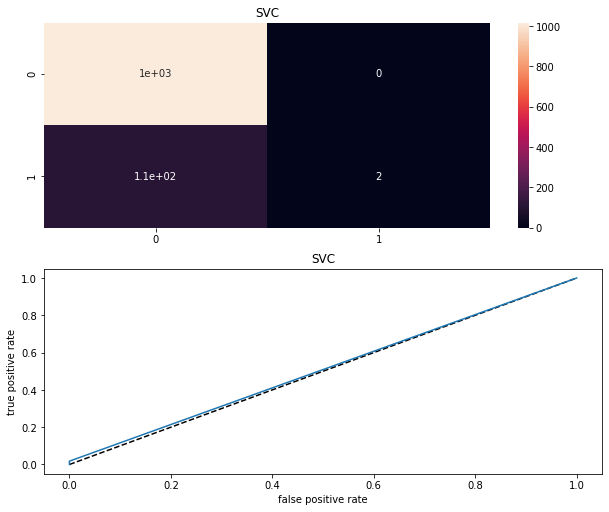




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


ACCURACY SCORE IS =  0.8928255093002657


CROSS_VAL_SCORE =  0.8920997301198771


ROC_AUC_SCORE =  0.5154384393875545


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.90      0.99      0.94      1017
           1       0.26      0.04      0.08       112

    accuracy                           0.89      1129
   macro avg       0.58      0.52      0.51      1129
weighted avg       0.84      0.89      0.86      1129



CONFUSION MATRIX [[1003   14]
 [ 107 

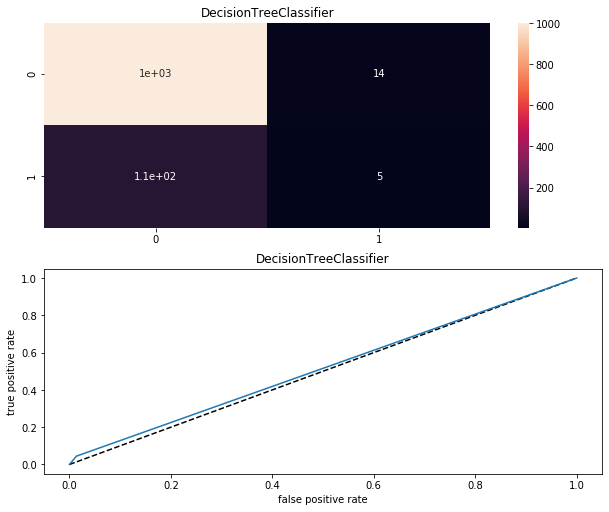




**************** KNeighborsClassifie ****************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


ACCURACY SCORE IS =  0.9016829052258636


CROSS_VAL_SCORE =  0.8963497144291722


ROC_AUC_SCORE =  0.5163822166034556


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.90      1.00      0.95      1017
           1       0.57      0.04      0.07       112

    accuracy                           0.90      1129
   macro avg       0.74      0.52      0.51      1129
weighted avg       0.87      0.90      0.86      1129



CONFUSION MATRIX [[1014    3]
 [ 108    4]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


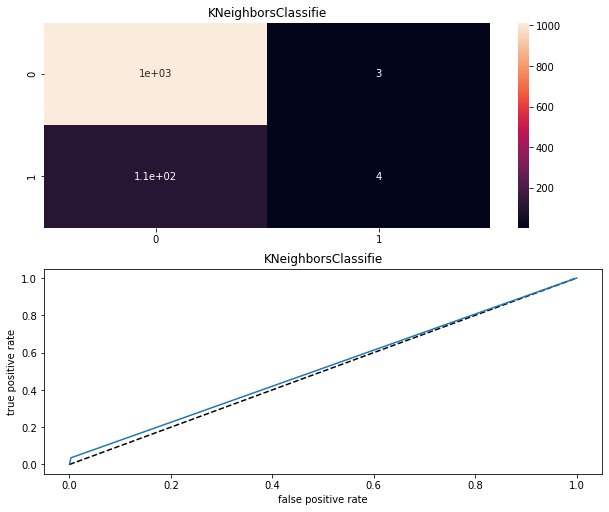

In [50]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS= accuracy_score(y_test,pred)
    print('ACCURACY SCORE IS = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('CONFUSION MATRIX',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(name)
    plt.show()
    print('\n\n')

In [51]:
result=pd.DataFrame({'Model': Model,'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

Model  Accuracy_score  Cross_val_score  Roc_auc_curve
0      LogisticRegression       89.902569        89.723467      50.696200
1              GaussianNB       10.717449        11.409653      50.442478
2                     SVC       90.256864        90.077920      50.892857
3  DecisionTreeClassifier       89.282551        89.209973      51.543844
4     KNeighborsClassifie       90.168291        89.634971      51.638222

### RandomForestClassifier

In [52]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
R_forest= RandomForestClassifier(n_estimators =200)
modelR= R_forest.fit(x_train, y_train)

# Predictions
pred_2 = modelR.predict(x_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of model 2 :  0.9025686448184234
The f1 score of model 2 :  0.03508771929824561


In [53]:
from math import sqrt
print("Test Results for Random Forest classifier Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred_2)))
print("R-squared: ", r2_score(y_test,pred_2))

Test Results for Random Forest classifier Model:
--------------------------------------------------
Root mean squared error:  0.3121399608854602
R-squared:  -0.09030411574659358


In [54]:
#Cross val score for random forest classifier:
print("Mean r2 score for R_forest classifier ",cross_val_score(R_forest,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for R_forst classifier ",cross_val_score(R_forest,x,y,cv=5,scoring="r2").std())

Mean r2 score for R_forest classifier  -0.12768311054317788
Standard Deviation r2 score for R_forst classifier  0.029682046175614478


## Choosing A Model

### SVC

From the Exploratory data Analysis and the Various models tried abve we could see that among all the prediction SUPPORT VECTOR CLASSIFIER= SVC is giving the best output or prediction result which is 90.25% , cross val score in 90.07%. Other than this logistic regression dtc and knn model is also giving the output near to the SVC, but they are slightly below the accuracy score of SUPPORT VECTOR CLASSIFIER= SVC.

Hence, I am going to choose the SUPPORT VECTOR CLASSIFIER= SVC model.

Through this model we will be able to predict the wheather the person with SARS-Cov-2 exam result positive or negative.

## Saving The Model

In [55]:
from sklearn.externals import joblib

In [56]:
joblib.dump(SVC,'Project_20_Brazil_Covid19_1_Analysis.obj')

['Project_20_Brazil_Covid19_1_Analysis.obj']

In [57]:
#loading back the model:
model=joblib.load('Project_20_Brazil_Covid19_1_Analysis.obj')

In [58]:
#Pridicting x_test SUPPORT VECTOR CLASSIFIER= SVC
SVC.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

# TASK 2

In [59]:
df2=df.copy()
df2

Patient age quantile  SARS-Cov-2 exam result  \
0                      13                       0   
1                      17                       0   
2                       8                       0   
3                       5                       0   
4                      15                       0   
...                   ...                     ...   
5639                    3                       1   
5640                   17                       0   
5641                    4                       0   
5642                   10                       0   
5643                   19                       1   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0            NaN        NaN                    NaN              NaN  ...   
1      -0.022340  -0.517413               0.010677         0.102004  ...   
2            NaN        NaN                    NaN              NaN  ...   
3            NaN        NaN                    NaN              NaN  ...   
4            NaN        NaN                    NaN              NaN  ...   
...          ...        ...                    ...              ...  ...   
5639         NaN        NaN                    NaN              NaN  ...   
5640         NaN        NaN                    NaN              NaN  ...   
5641         NaN        NaN                    NaN              NaN  ...   
5642         NaN        NaN                    NaN              NaN  ...   
5643    0.541564  -0.906829              -0.325903         0.578024  ...   

      Hb saturation (arterial blood gases)  \
0                                      NaN   
1                               

## df3 = Only confirmed cases

In [60]:
#Separating positive data 
df3 = df2[df2['SARS-Cov-2 exam result']==1]

In [61]:
df3

Patient age quantile  SARS-Cov-2 exam result  \
67                      7                       1   
284                    16                       1   
513                    10                       1   
568                     2                       1   
676                    15                       1   
...                   ...                     ...   
5632                   16                       1   
5633                    4                       1   
5634                   15                       1   
5639                    3                       1   
5643                   19                       1   

      Patient addmited to regular ward (1=yes, 0=no)  \
67                                                 0   
284                                                1   
513                                                0   
568                                                0   
676                                                0   
...                                              ...   
5632                                               0   
5633                                               0   
5634                                               0   
5639                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                    0       
284                                                   0       
513                                                   0       
568                                                   0       
676                                                   0       
...                                                 ...       
5632                                                  0       
5633                                                  0       
5634                                                  0       
5639                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0             NaN   
284                                                   0             NaN   
513                                                   0             NaN   
568                                                   0        0.991838   
676                                                   0             NaN   
...                                                 ...             ...   
5632                                                  0             NaN   
5633                                                  0             NaN   
5634                                                  0             NaN   
5639                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
67           NaN        NaN                    NaN              NaN  ...   
284          NaN        NaN                    NaN              NaN  ...   
513          NaN        NaN                    NaN              NaN  ...   
568     0.792188  -0.341548               1.469188         1.653476  ...   
676          NaN        NaN                    NaN              NaN  ...   
...          ...        ...                    ...              ...  ...   
5632         NaN        NaN                    NaN              NaN  ...   
5633         NaN        NaN                    NaN              NaN  ...   
5634         NaN        NaN                    NaN              NaN  ...   
5639         NaN        NaN                    NaN              NaN  ...   
5643    0.541564  -0.906829              -0.325903         0.578024  ...   

      Hb saturation (arterial blood gases)  \
67                                     NaN   
284                             

In [62]:
from sklearn.preprocessing import LabelEncoder

for c in df3.columns:
    if df3[c].dtype=='float16' or  df3[c].dtype=='float32' or  df3[c].dtype=='float64':
        df3[c].fillna(df3[c].mean())

#fill in -999 for categoricals
df3 = df3.fillna(-999)
# Label Encoding
for f in df3.columns:
    if df3[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df3[f].values))
        df3[f] = lbl.transform(list(df3[f].values)) 

In [63]:
df3.head()

Patient age quantile  SARS-Cov-2 exam result  \
67                     17                       1   
284                     8                       1   
513                     2                       1   
568                    12                       1   
676                     7                       1   

     Patient addmited to regular ward (1=yes, 0=no)  \
67                                                0   
284                                               1   
513                                               0   
568                                               0   
676                                               0   

     Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                   0       
284                                                  0       
513                                                  0       
568                                                  0       
676                                                  0       

     Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                   0     -999.000000   
284                                                  0     -999.000000   
513                                                  0     -999.000000   
568                                                  0        0.991838   
676                                                  0     -999.000000   

     Hemoglobin   Platelets  Mean platelet volume   Red blood Cells  ...  \
67  -999.000000 -999.000000            -999.000000      -999.000000  ...   
284 -999.000000 -999.000000            -999.000000      -999.000000  ...   
513 -999.000000 -999.000000            -999.000000      -999.000000  ...   
568    0.792188   -0.341548               1.469188         1.653476  ...   
676 -999.000000 -999.000000            -999.000000      -999.000000  ...   

     Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
67                                 -999.0                              -999.0   
284                                -999.0                              -999.0   
513                                -999.0                              -999.0   
568                                -999.0                              -999.0   
676                                -999.0                              -999.0   

     Base excess (arterial blood gas analysis)  \
67                                      -999.0   
284                                     -999.0   
513                                     -999.0   
568                                     -999.0   
676                                     -999.0   

     pH (arterial blood gas analysis)  \
67                             -999.0   
284                            -999.0   
513                            -999.0   
568                            -999.0   
676                            -999.0   

     Total CO2 (arterial blood gas analysis)  \
67                                    -999.0   
284                                   -999.0   
513                                   -999.0   
568                                   -999.0   
676                                   -999.0   

     HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
67                               -999.0                             -999.0   
284                              -999.0                             -999.0   
513                              -999.0                             -999.0   
568                              -999.0                             -999.0   
676                              -999.0                             -999.0   

     Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
67          -999.0    -999.0                              -999.0  
284         -999.0    -999.0                              -999.0  
513         -999.0    -999.0                              -999.0  
568         -999.0 

In [64]:
# Threshold for removing correlated variables
threshold = 0.92
# Absolute value correlation matrix
corr_matrix = df3.corr().abs()
corr_matrix.head()

Patient age quantile  \
Patient age quantile                                            1.000000   
SARS-Cov-2 exam result                                               NaN   
Patient addmited to regular ward (1=yes, 0=no)                  0.111500   
Patient addmited to semi-intensive unit (1=yes,...              0.072466   
Patient addmited to intensive care unit (1=yes,...              0.072466   

                                                    SARS-Cov-2 exam result  \
Patient age quantile                                                   NaN   
SARS-Cov-2 exam result                                                 NaN   
Patient addmited to regular ward (1=yes, 0=no)                         NaN   
Patient addmited to semi-intensive unit (1=yes,...                     NaN   
Patient addmited to intensive care unit (1=yes,...                     NaN   

                                                    Patient addmited to regular ward (1=yes, 0=no)  \
Patient age quantile                                                                      0.111500   
SARS-Cov-2 exam result                                                                         NaN   
Patient addmited to regular ward (1=yes, 0=no)                                            1.000000   
Patient addmited to semi-intensive unit (1=yes,...                                        0.031672   
Patient addmited to intensive care unit (1=yes,...                                        0.031672   

                                                    Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient age quantile                                                                         0.072466       
SARS-Cov-2 exam result                                                                            NaN       
Patient addmited to regular ward (1=yes, 0=no)                                               0.031672       
Patient addmited to semi-intensive unit (1=yes,...                                           1.000000       
Patient addmited to intensive care unit (1=yes,...                                           0.014545       

                                                    Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient age quantile                                                                         0.072466       
SARS-Cov-2 exam result                                                                            NaN       
Patient addmited to regular ward (1=yes, 0=no)                                               0.031672       
Patient addmited to semi-intensive unit (1=yes,...                                           0.014545       
Patient addmited to intensive care unit (1=yes,...                                           1.000000       

                                                    Hematocrit  Hemoglobin  \
Patient age quantile                                  0.167903    0.167905   
SARS-Cov-2 exam result                                     NaN         NaN   
Patient addmited to regular ward (1=yes, 0=no)        0.443748    0.443714   
Patient addmited to semi-intensive unit (1=yes,...    0.288460    0.288487   
Patient addmited to intensive care unit (1=yes,...    0.288478    0.288545   

                                                    Platelets  \
Patient age quantile                                 0.167896   
SARS-Cov-2 exam result                                    NaN   
Patient addmited to regular ward (1=yes, 0=no)       0.443646   
Patient addmited to semi-intensive unit (1=yes,...   0.288537   
Patient addmited to intensive care unit (1=yes,...   0.288581   

                                                    Mean platelet volume   \
Patient age quantile                                             0.166516   
SARS-Cov-2 exam result                                                NaN   
Patient addmited to regular ward (1=yes, 0=no)                   0.430190   
Patient addmited to semi-intensive 

In [65]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

Patient age quantile  \
Patient age quantile                                                 NaN   
SARS-Cov-2 exam result                                               NaN   
Patient addmited to regular ward (1=yes, 0=no)                       NaN   
Patient addmited to semi-intensive unit (1=yes,...                   NaN   
Patient addmited to intensive care unit (1=yes,...                   NaN   

                                                    SARS-Cov-2 exam result  \
Patient age quantile                                                   NaN   
SARS-Cov-2 exam result                                                 NaN   
Patient addmited to regular ward (1=yes, 0=no)                         NaN   
Patient addmited to semi-intensive unit (1=yes,...                     NaN   
Patient addmited to intensive care unit (1=yes,...                     NaN   

                                                    Patient addmited to regular ward (1=yes, 0=no)  \
Patient age quantile                                                                        0.1115   
SARS-Cov-2 exam result                                                                         NaN   
Patient addmited to regular ward (1=yes, 0=no)                                                 NaN   
Patient addmited to semi-intensive unit (1=yes,...                                             NaN   
Patient addmited to intensive care unit (1=yes,...                                             NaN   

                                                    Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient age quantile                                                                         0.072466       
SARS-Cov-2 exam result                                                                            NaN       
Patient addmited to regular ward (1=yes, 0=no)                                               0.031672       
Patient addmited to semi-intensive unit (1=yes,...                                                NaN       
Patient addmited to intensive care unit (1=yes,...                                                NaN       

                                                    Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient age quantile                                                                         0.072466       
SARS-Cov-2 exam result                                                                            NaN       
Patient addmited to regular ward (1=yes, 0=no)                                               0.031672       
Patient addmited to semi-intensive unit (1=yes,...                                           0.014545       
Patient addmited to intensive care unit (1=yes,...                                                NaN       

                                                    Hematocrit  Hemoglobin  \
Patient age quantile                                  0.167903    0.167905   
SARS-Cov-2 exam result                                     NaN         NaN   
Patient addmited to regular ward (1=yes, 0=no)        0.443748    0.443714   
Patient addmited to semi-intensive unit (1=yes,...    0.288460    0.288487   
Patient addmited to intensive care unit (1=yes,...    0.288478    0.288545   

                                                    Platelets  \
Patient age quantile                                 0.167896   
SARS-Cov-2 exam result                                    NaN   
Patient addmited to regular ward (1=yes, 0=no)       0.443646   
Patient addmited to semi-intensive unit (1=yes,...   0.288537   
Patient addmited to intensive care unit (1=yes,...   0.288581   

                                                    Mean platelet volume   \
Patient age quantile                                             0.166516   
SARS-Cov-2 exam result                                                NaN   
Patient addmited to regular ward (1=yes, 0=no)                   0.430190   
Patient addmited to semi-intensive 

In [66]:
# Select columns with correlations above threshold

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
df3 = df3.drop(columns = to_drop)
print('Data shape: ', df3.shape)
print('Size of the data', df3.shape)

There are 68 columns to remove.
Data shape:  (558, 42)
Size of the data (558, 42)


In [67]:
# Dataset missing values (in percent)
df3_missing = (df3.isnull().sum() / len(df3)).sort_values(ascending = False)
df3_missing.head()

Phosphor                            0.0
Proteina C reativa mg/dL            0.0
pCO2 (venous blood gas analysis)    0.0
Magnesium                           0.0
Strepto A                           0.0
dtype: float64

In [68]:
df3.shape

(558, 42)

In [69]:
data_frame_list = [df3]
for df3 in data_frame_list:
    df3.ffill(inplace=True)

In [70]:
data_frame_list = [df3]
for df3 in data_frame_list:
    df3.bfill(inplace=True)

### Changing Column:

# 2.1

Bringing Patient addmited to regular ward (1=yes, 0=no) column at the 1st column, in-order to ease of the calculation.

In [71]:
mid = df3['Patient addmited to regular ward (1=yes, 0=no)']
df3.drop(labels=['Patient addmited to regular ward (1=yes, 0=no)'], axis=1, inplace = True)
df3.insert(0, 'Patient addmited to regular ward (1=yes, 0=no)', mid)
df3.head()

Patient addmited to regular ward (1=yes, 0=no)  Patient age quantile  \
67                                                0                    17   
284                                               1                     8   
513                                               0                     2   
568                                               0                    12   
676                                               0                     7   

     SARS-Cov-2 exam result  \
67                        1   
284                       1   
513                       1   
568                       1   
676                       1   

     Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                   0       
284                                                  0       
513                                                  0       
568                                                  0       
676                                                  0       

     Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                   0     -999.000000   
284                                                  0     -999.000000   
513                                                  0     -999.000000   
568                                                  0        0.991838   
676                                                  0     -999.000000   

     Serum Glucose  Respiratory Syncytial Virus  Mycoplasma pneumoniae  \
67          -999.0                            0                 -999.0   
284         -999.0                            1                 -999.0   
513         -999.0                            1                 -999.0   
568         -999.0                            1                 -999.0   
676         -999.0                            0                 -999.0   

           Urea  ...  Prothrombin time (PT), Activity  Vitamin B12  \
67  -999.000000  ...                           -999.0       -999.0   
284 -999.000000  ...                           -999.0       -999.0   
513 -999.000000  ...                           -999.0       -999.0   
568   -0.513909  ...                           -999.0       -999.0   
676 -999.000000  ...                           -999.0       -999.0   

     Creatine phosphokinase (CPK)   Ferritin  Arterial Lactic Acid  \
67                     -999.000000    -999.0                -999.0   
284                    -999.000000    -999.0                -999.0   
513                    -999.000000    -999.0                -999.0   
568                       0.125483    -999.0                -999.0   
676                    -999.000000    -999.0                -999.0   

     Lipase dosage  D-Dimer  Albumin  Arteiral Fio2  Phosphor  
67          -999.0   -999.0   -999.0         -999.0    -999.0  
284         -999.0   -999.0   -999.0         -999.0    -999.0  
513         -999.0   -999.0   -999.0         -999.0    -999.0  
568         -999.0   -999.0   -999.0         -999.0    -999.0  
676         -999.0   -999.0   -999.0         -999.0    -999.0  

[5 rows x 42 columns]

In [72]:
#Assigning x and y variables:
x=df3.iloc[:,1:42]
x.shape
x.head(10)

Patient age quantile  SARS-Cov-2 exam result  \
67                      17                       1   
284                      8                       1   
513                      2                       1   
568                     12                       1   
676                      7                       1   
884                      7                       1   
1011                    17                       1   
1108                     6                       1   
1113                    15                       1   
1129                    19                       1   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                    0       
284                                                   0       
513                                                   0       
568                                                   0       
676                                                   0       
884                                                   0       
1011                                                  0       
1108                                                  0       
1113                                                  0       
1129                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0     -999.000000   
284                                                   0     -999.000000   
513                                                   0     -999.000000   
568                                                   0        0.991838   
676                                                   0     -999.000000   
884                                                   0       -0.495919   
1011                                                  0     -999.000000   
1108                                                  0       -0.312811   
1113                                                  0     -999.000000   
1129                                                  0     -999.000000   

      Serum Glucose  Respiratory Syncytial Virus  Mycoplasma pneumoniae  \
67      -999.000000                            0                 -999.0   
284     -999.000000                            1                 -999.0   
513     -999.000000                            1                 -999.0   
568     -999.000000                            1                 -999.0   
676     -999.000000                            0                 -999.0   
884       -0.928044                            1                 -999.0   
1011    -999.000000                            0                 -999.0   
1108      -0.110364                            1                 -999.0   
1113    -999.000000                            0                 -999.0   
1129    -999.000000                            0                 -999.0   

            Urea  Proteina C reativa mg/dL  ...  \
67   -999.000000               -999.000000  ...   
284  -999.000000               -999.000000  ...   
513  -999.000000               -999.000000  ...   
568    -0.513909               -999.000000  ...   
676  -999.000000               -999.000000  ...   
884     0.974759                 -0.247246  ...   
1011 -999.000000               -999.000000  ...   
1108    0.304858                 -0.479726  ...   
1113 -999.000000               -999.000000  ...   
1129 -999.000000               -999.000000  ...   

      Prothrombin time (PT), Activity  Vitamin B12  \
67                             -999.0       -999.0   
284                            -999.0       -999.0   
513                            -999.0       -999.0   
568                            -999.0       -999.0   
676                            -999.0       -999.0   
884                            -999.0       -999.0   
1011                           -999.0       -999.0   
1108                           -999.0       -999.0   
1113             

In [73]:
y=df3.iloc[:,0:1]
y.shape
y

Patient addmited to regular ward (1=yes, 0=no)
67                                                 0
284                                                1
513                                                0
568                                                0
676                                                0
...                                              ...
5632                                               0
5633                                               0
5634                                               0
5639                                               0
5643                                               0

[558 rows x 1 columns]

In [74]:
#Standard Scaler:
#To bring all the values at the same scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_scaler = scaler.transform(x)
x = pd.DataFrame(df1_scaler)
x.head(10)

0    1         2         3         4         5         6    7   \
0  1.169569  0.0 -0.120605 -0.120605 -0.418015 -0.250713 -0.501120  0.0   
1 -0.485892  0.0 -0.120605 -0.120605 -0.418015 -0.250713  1.995531  0.0   
2 -1.589532  0.0 -0.120605 -0.120605 -0.418015 -0.250713  1.995531  0.0   
3  0.249868  0.0 -0.120605 -0.120605  2.394347 -0.250713  1.995531  0.0   
4 -0.669832  0.0 -0.120605 -0.120605 -0.418015 -0.250713 -0.501120  0.0   
5 -0.669832  0.0 -0.120605 -0.120605  2.390163  3.984865  1.995531  0.0   
6  1.169569  0.0 -0.120605 -0.120605 -0.418015 -0.250713 -0.501120  0.0   
7 -0.853772  0.0 -0.120605 -0.120605  2.390678  3.988335  1.995531  0.0   
8  0.801689  0.0 -0.120605 -0.120605 -0.418015 -0.250713 -0.501120  0.0   
9  1.537449  0.0 -0.120605 -0.120605 -0.418015 -0.250713 -0.501120  0.0   

         8         9   ...   31   32        33        34        35        36  \
0 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
1 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
2 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
3  2.907066 -0.378738  ...  0.0  0.0  4.824063 -0.059976 -0.154445 -0.073521   
4 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
5  2.911912  2.639055  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
6 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
7  2.909731  2.638353  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
8 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
9 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   

    37   38        39        40  
0  0.0  0.0 -0.128037 -0.042371  
1  0.0  0.0 -0.128037 -0.042371  
2  0.0  0.0 -0.128037 -0.042371  
3  0.0  0.0 -0.128037 -0.042371  
4  0.0  0.0 -0.128037 -0.042371  
5  0.0  0.0 -0.128037 -0.042371  
6  0.0  0.0 -0.128037 -0.042371  
7  0.0  0.0 -0.128037 -0.042371  
8  0.0  0.0 -0.128037 -0.042371  
9  0.0  0.0 -0.128037 -0.042371  

[10 rows x 41 columns]

### Model Testing:

1. Logistic Regression
2. Gaussian NB
3. SVC
4. Decision Tree Classifier
5. KNeighbors Classifier

In [75]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [76]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(446, 41) (112, 41)
(446, 1) (112, 1)


In [77]:
from sklearn.svm import SVC
LOR=LogisticRegression()
GNB=GaussianNB()
SVC=SVC()
DTC=DecisionTreeClassifier(random_state=10)
KNN=KNeighborsClassifier()

In [78]:
models= []
models.append(('LogisticRegression',LOR))
models.append(('GaussianNB',GNB))
models.append(('SVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KNeighborsClassifie',KNN))

**************** LogisticRegression ****************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY SCORE IS =  0.9642857142857143


CROSS_VAL_SCORE =  0.9373376623376624


ROC_AUC_SCORE =  0.780952380952381


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.97      0.99      0.98       105
           1       0.80      0.57      0.67         7

    accuracy                           0.96       112
   macro avg       0.89      0.78      0.82       112
weighted avg       0.96      0.96      0.96       112



CONFUSION MATRIX [[104   1]
 [  3   4]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


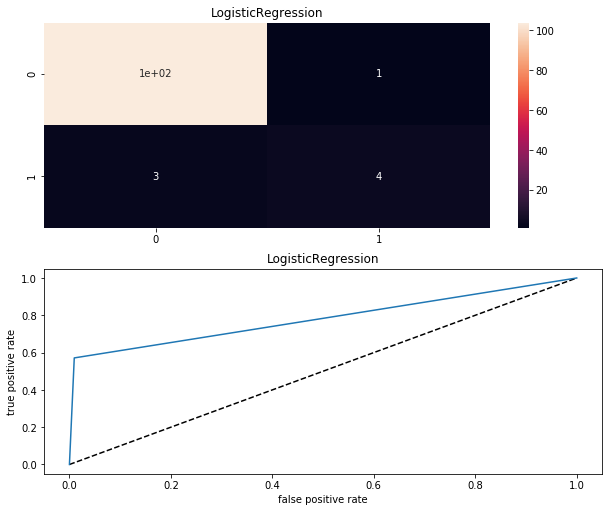




**************** GaussianNB ****************


GaussianNB(priors=None, var_smoothing=1e-09)


ACCURACY SCORE IS =  0.7678571428571429


CROSS_VAL_SCORE =  0.6617532467532466


ROC_AUC_SCORE =  0.8761904761904762


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       1.00      0.75      0.86       105
           1       0.21      1.00      0.35         7

    accuracy                           0.77       112
   macro avg       0.61      0.88      0.60       112
weighted avg       0.95      0.77      0.83       112



CONFUSION MATRIX [[79 26]
 [ 0  7]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


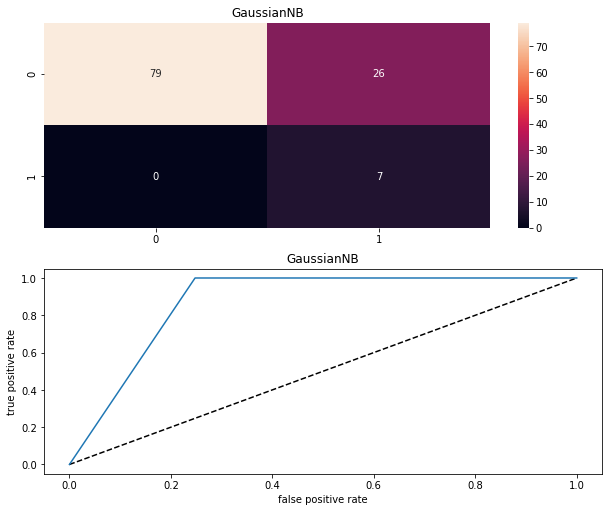




**************** SVC ****************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


ACCURACY SCORE IS =  0.9464285714285714


CROSS_VAL_SCORE =  0.9337337662337661


ROC_AUC_SCORE =  0.5714285714285714


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.95      1.00      0.97       105
           1       1.00      0.14      0.25         7

    accuracy                           0.95       112
   macro avg       0.97      0.57      0.61       112
weighted avg       0.95      0.95      0.93       112



CONFUSION MATRIX [[105   0]
 [  6   1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


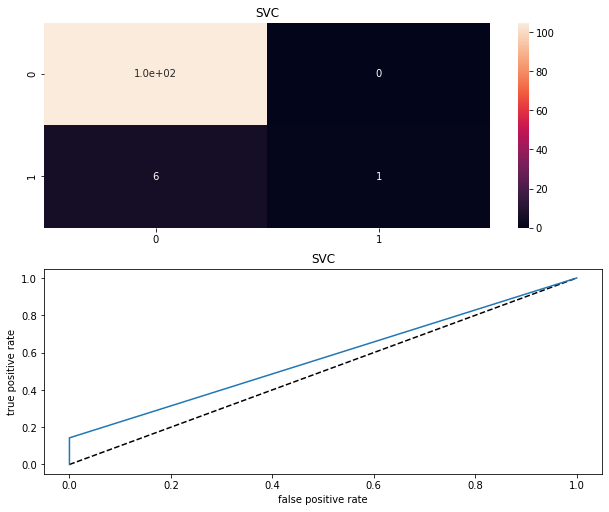




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


ACCURACY SCORE IS =  0.9553571428571429


CROSS_VAL_SCORE =  0.9373701298701297


ROC_AUC_SCORE =  0.7095238095238096


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.96      0.99      0.98       105
           1       0.75      0.43      0.55         7

    accuracy                           0.96       112
   macro avg       0.86      0.71      0.76       112
weighted avg       0.95      0.96      0.95       112



CONFUSION MATRIX [[104   1]
 [  4   3

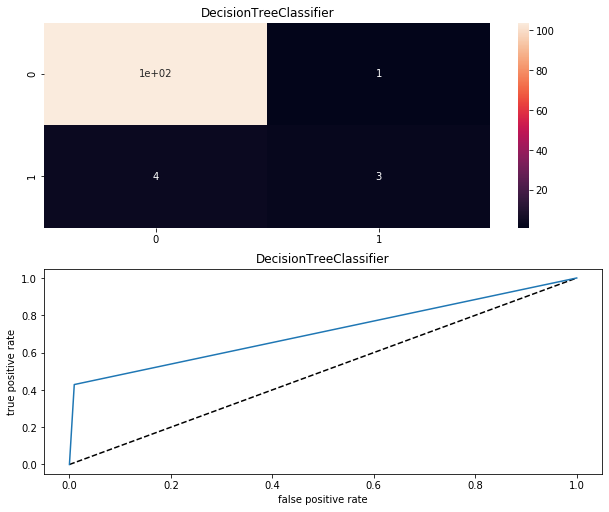




**************** KNeighborsClassifie ****************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


ACCURACY SCORE IS =  0.9375


CROSS_VAL_SCORE =  0.9212662337662337


ROC_AUC_SCORE =  0.7


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.96      0.97      0.97       105
           1       0.50      0.43      0.46         7

    accuracy                           0.94       112
   macro avg       0.73      0.70      0.71       112
weighted avg       0.93      0.94      0.94       112



CONFUSION MATRIX [[102   3]
 [  4   3]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


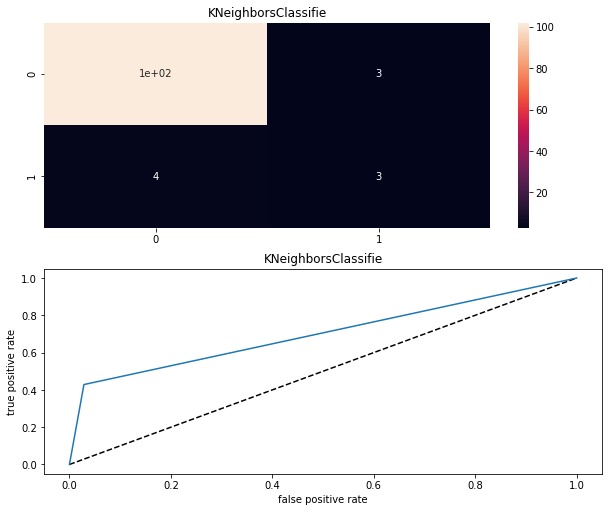

In [79]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS= accuracy_score(y_test,pred)
    print('ACCURACY SCORE IS = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('CONFUSION MATRIX',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(name)
    plt.show()
    print('\n\n')

### Result for 2.1 Patient addmited to regular ward (1=yes, 0=no)

In [80]:
result=pd.DataFrame({'Model': Model,'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

Model  Accuracy_score  Cross_val_score  Roc_auc_curve
0      LogisticRegression       96.428571        93.733766      78.095238
1              GaussianNB       76.785714        66.175325      87.619048
2                     SVC       94.642857        93.373377      57.142857
3  DecisionTreeClassifier       95.535714        93.737013      70.952381
4     KNeighborsClassifie       93.750000        92.126623      70.000000

## Choosing a Model:
    
I am goin to choose the logistic regression model for predicting Patient addmited to regular ward (1=yes, 0=no) from the confirmed case as the accuracy score is highest among all other models tested above which is 96.42%

### Saving the file:

In [81]:
joblib.dump(LOR,'Project_20_Brazil_Covid19_2.1_Analysis.obj')

['Project_20_Brazil_Covid19_2.1_Analysis.obj']

In [82]:
#loading back the model:
model=joblib.load('Project_20_Brazil_Covid19_2.1_Analysis.obj')

In [83]:
#Pridicting x_test logistic regression = LOR
LOR.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

## Changing Column:

# 2.2

Bringing Patient addmited to semi-intensive unit (1=yes, 0=no) column at the 1st column, in-order to ease of the calculation.

In [84]:
df4=df3.copy()
df4.head()

Patient addmited to regular ward (1=yes, 0=no)  Patient age quantile  \
67                                                0                    17   
284                                               1                     8   
513                                               0                     2   
568                                               0                    12   
676                                               0                     7   

     SARS-Cov-2 exam result  \
67                        1   
284                       1   
513                       1   
568                       1   
676                       1   

     Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                   0       
284                                                  0       
513                                                  0       
568                                                  0       
676                                                  0       

     Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                   0     -999.000000   
284                                                  0     -999.000000   
513                                                  0     -999.000000   
568                                                  0        0.991838   
676                                                  0     -999.000000   

     Serum Glucose  Respiratory Syncytial Virus  Mycoplasma pneumoniae  \
67          -999.0                            0                 -999.0   
284         -999.0                            1                 -999.0   
513         -999.0                            1                 -999.0   
568         -999.0                            1                 -999.0   
676         -999.0                            0                 -999.0   

           Urea  ...  Prothrombin time (PT), Activity  Vitamin B12  \
67  -999.000000  ...                           -999.0       -999.0   
284 -999.000000  ...                           -999.0       -999.0   
513 -999.000000  ...                           -999.0       -999.0   
568   -0.513909  ...                           -999.0       -999.0   
676 -999.000000  ...                           -999.0       -999.0   

     Creatine phosphokinase (CPK)   Ferritin  Arterial Lactic Acid  \
67                     -999.000000    -999.0                -999.0   
284                    -999.000000    -999.0                -999.0   
513                    -999.000000    -999.0                -999.0   
568                       0.125483    -999.0                -999.0   
676                    -999.000000    -999.0                -999.0   

     Lipase dosage  D-Dimer  Albumin  Arteiral Fio2  Phosphor  
67          -999.0   -999.0   -999.0         -999.0    -999.0  
284         -999.0   -999.0   -999.0         -999.0    -999.0  
513         -999.0   -999.0   -999.0         -999.0    -999.0  
568         -999.0   -999.0   -999.0         -999.0    -999.0  
676         -999.0   -999.0   -999.0         -999.0    -999.0  

[5 rows x 42 columns]

In [85]:
mid = df4['Patient addmited to semi-intensive unit (1=yes, 0=no)']
df4.drop(labels=['Patient addmited to semi-intensive unit (1=yes, 0=no)'], axis=1, inplace = True)
df4.insert(0, 'Patient addmited to semi-intensive unit (1=yes, 0=no)', mid)
df4.head()

Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                   0       
284                                                  0       
513                                                  0       
568                                                  0       
676                                                  0       

     Patient addmited to regular ward (1=yes, 0=no)  Patient age quantile  \
67                                                0                    17   
284                                               1                     8   
513                                               0                     2   
568                                               0                    12   
676                                               0                     7   

     SARS-Cov-2 exam result  \
67                        1   
284                       1   
513                       1   
568                       1   
676                       1   

     Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                   0     -999.000000   
284                                                  0     -999.000000   
513                                                  0     -999.000000   
568                                                  0        0.991838   
676                                                  0     -999.000000   

     Serum Glucose  Respiratory Syncytial Virus  Mycoplasma pneumoniae  \
67          -999.0                            0                 -999.0   
284         -999.0                            1                 -999.0   
513         -999.0                            1                 -999.0   
568         -999.0                            1                 -999.0   
676         -999.0                            0                 -999.0   

           Urea  ...  Prothrombin time (PT), Activity  Vitamin B12  \
67  -999.000000  ...                           -999.0       -999.0   
284 -999.000000  ...                           -999.0       -999.0   
513 -999.000000  ...                           -999.0       -999.0   
568   -0.513909  ...                           -999.0       -999.0   
676 -999.000000  ...                           -999.0       -999.0   

     Creatine phosphokinase (CPK)   Ferritin  Arterial Lactic Acid  \
67                     -999.000000    -999.0                -999.0   
284                    -999.000000    -999.0                -999.0   
513                    -999.000000    -999.0                -999.0   
568                       0.125483    -999.0                -999.0   
676                    -999.000000    -999.0                -999.0   

     Lipase dosage  D-Dimer  Albumin  Arteiral Fio2  Phosphor  
67          -999.0   -999.0   -999.0         -999.0    -999.0  
284         -999.0   -999.0   -999.0         -999.0    -999.0  
513         -999.0   -999.0   -999.0         -999.0    -999.0  
568         -999.0   -999.0   -999.0         -999.0    -999.0  
676         -999.0   -999.0   -999.0         -999.0    -999.0  

[5 rows x 42 columns]

In [86]:
#Assigning x and y variables:
x=df4.iloc[:,1:42]
x.shape
x.head(10)

Patient addmited to regular ward (1=yes, 0=no)  Patient age quantile  \
67                                                 0                    17   
284                                                1                     8   
513                                                0                     2   
568                                                0                    12   
676                                                0                     7   
884                                                1                     7   
1011                                               0                    17   
1108                                               0                     6   
1113                                               0                    15   
1129                                               0                    19   

      SARS-Cov-2 exam result  \
67                         1   
284                        1   
513                        1   
568                        1   
676                        1   
884                        1   
1011                       1   
1108                       1   
1113                       1   
1129                       1   

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0     -999.000000   
284                                                   0     -999.000000   
513                                                   0     -999.000000   
568                                                   0        0.991838   
676                                                   0     -999.000000   
884                                                   0       -0.495919   
1011                                                  0     -999.000000   
1108                                                  0       -0.312811   
1113                                                  0     -999.000000   
1129                                                  0     -999.000000   

      Serum Glucose  Respiratory Syncytial Virus  Mycoplasma pneumoniae  \
67      -999.000000                            0                 -999.0   
284     -999.000000                            1                 -999.0   
513     -999.000000                            1                 -999.0   
568     -999.000000                            1                 -999.0   
676     -999.000000                            0                 -999.0   
884       -0.928044                            1                 -999.0   
1011    -999.000000                            0                 -999.0   
1108      -0.110364                            1                 -999.0   
1113    -999.000000                            0                 -999.0   
1129    -999.000000                            0                 -999.0   

            Urea  Proteina C reativa mg/dL  ...  \
67   -999.000000               -999.000000  ...   
284  -999.000000               -999.000000  ...   
513  -999.000000               -999.000000  ...   
568    -0.513909               -999.000000  ...   
676  -999.000000               -999.000000  ...   
884     0.974759                 -0.247246  ...   
1011 -999.000000               -999.000000  ...   
1108    0.304858                 -0.479726  ...   
1113 -999.000000               -999.000000  ...   
1129 -999.000000               -999.000000  ...   

      Prothrombin time (PT), Activity  Vitamin B12  \
67                             -999.0       -999.0   
284                            -999.0       -999.0   
513                            -999.0       -999.0   
568                            -999.0       -999.0   
676                            -999.0       -999.0   
884                            -999.0       -999.0   
1011                           -999.0       -999.0   
1108                           -999.0       -999.0   
1113                           -999.0       -999.0   
1129                           -999.0   

In [87]:
y=df4.iloc[:,0:1]
y.shape
y

Patient addmited to semi-intensive unit (1=yes, 0=no)
67                                                    0    
284                                                   0    
513                                                   0    
568                                                   0    
676                                                   0    
...                                                 ...    
5632                                                  0    
5633                                                  0    
5634                                                  0    
5639                                                  0    
5643                                                  0    

[558 rows x 1 columns]

In [88]:
#Standard Scaler:
#To bring all the values at the same scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_scaler = scaler.transform(x)
x = pd.DataFrame(df1_scaler)
x.head(10)

0         1    2         3         4         5         6    7   \
0 -0.262613  1.169569  0.0 -0.120605 -0.418015 -0.250713 -0.501120  0.0   
1  3.807887 -0.485892  0.0 -0.120605 -0.418015 -0.250713  1.995531  0.0   
2 -0.262613 -1.589532  0.0 -0.120605 -0.418015 -0.250713  1.995531  0.0   
3 -0.262613  0.249868  0.0 -0.120605  2.394347 -0.250713  1.995531  0.0   
4 -0.262613 -0.669832  0.0 -0.120605 -0.418015 -0.250713 -0.501120  0.0   
5  3.807887 -0.669832  0.0 -0.120605  2.390163  3.984865  1.995531  0.0   
6 -0.262613  1.169569  0.0 -0.120605 -0.418015 -0.250713 -0.501120  0.0   
7 -0.262613 -0.853772  0.0 -0.120605  2.390678  3.988335  1.995531  0.0   
8 -0.262613  0.801689  0.0 -0.120605 -0.418015 -0.250713 -0.501120  0.0   
9 -0.262613  1.537449  0.0 -0.120605 -0.418015 -0.250713 -0.501120  0.0   

         8         9   ...   31   32        33        34        35        36  \
0 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
1 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
2 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
3  2.907066 -0.378738  ...  0.0  0.0  4.824063 -0.059976 -0.154445 -0.073521   
4 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
5  2.911912  2.639055  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
6 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
7  2.909731  2.638353  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
8 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
9 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   

    37   38        39        40  
0  0.0  0.0 -0.128037 -0.042371  
1  0.0  0.0 -0.128037 -0.042371  
2  0.0  0.0 -0.128037 -0.042371  
3  0.0  0.0 -0.128037 -0.042371  
4  0.0  0.0 -0.128037 -0.042371  
5  0.0  0.0 -0.128037 -0.042371  
6  0.0  0.0 -0.128037 -0.042371  
7  0.0  0.0 -0.128037 -0.042371  
8  0.0  0.0 -0.128037 -0.042371  
9  0.0  0.0 -0.128037 -0.042371  

[10 rows x 41 columns]

### Model Testing:

1. Logistic Regression
2. Gaussian NB
3. SVC
4. Decision Tree Classifier
5. KNeighbors Classifier

In [89]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [90]:
from sklearn.svm import SVC
LOR=LogisticRegression()
GNB=GaussianNB()
SVC=SVC()
DTC=DecisionTreeClassifier(random_state=10)
KNN=KNeighborsClassifier()

In [91]:
models= []
models.append(('LogisticRegression',LOR))
models.append(('GaussianNB',GNB))
models.append(('SVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KNeighborsClassifie',KNN))

**************** LogisticRegression ****************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY SCORE IS =  0.9732142857142857


CROSS_VAL_SCORE =  0.9892532467532467


ROC_AUC_SCORE =  0.4954545454545455


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.00      0.00      0.00         2

    accuracy                           0.97       112
   macro avg       0.49      0.50      0.49       112
weighted avg       0.96      0.97      0.97       112



CONFUSION MATRIX [[109   1]
 [  2   0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


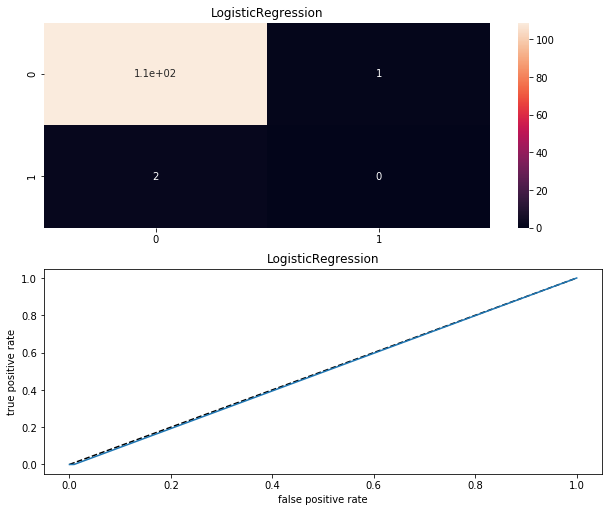




**************** GaussianNB ****************


GaussianNB(priors=None, var_smoothing=1e-09)


ACCURACY SCORE IS =  0.9642857142857143


CROSS_VAL_SCORE =  0.9516883116883117


ROC_AUC_SCORE =  0.7363636363636364


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.99      0.97      0.98       110
           1       0.25      0.50      0.33         2

    accuracy                           0.96       112
   macro avg       0.62      0.74      0.66       112
weighted avg       0.98      0.96      0.97       112



CONFUSION MATRIX [[107   3]
 [  1   1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


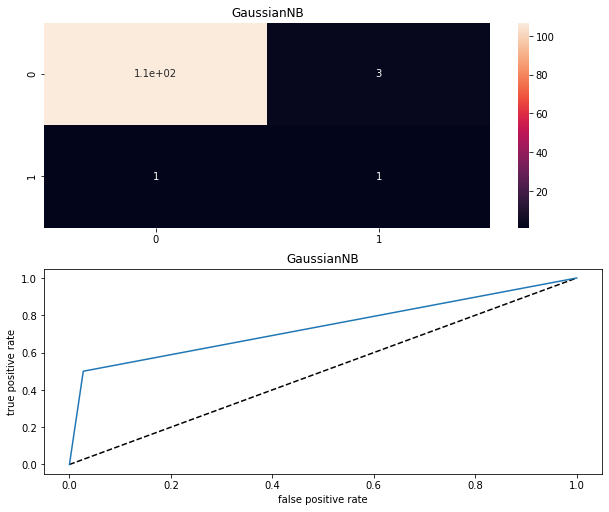




**************** SVC ****************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


ACCURACY SCORE IS =  0.9821428571428571


CROSS_VAL_SCORE =  0.9892857142857142


ROC_AUC_SCORE =  0.5


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.98      1.00      0.99       110
           1       0.00      0.00      0.00         2

    accuracy                           0.98       112
   macro avg       0.49      0.50      0.50       112
weighted avg       0.96      0.98      0.97       112



CONFUSION MATRIX [[110   0]
 [  2   0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


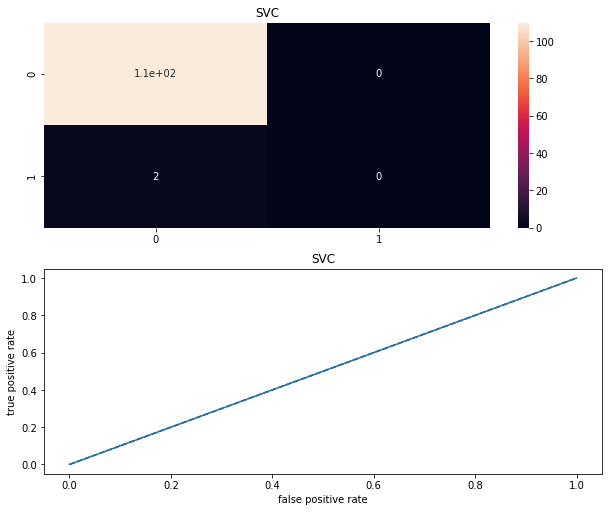




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


ACCURACY SCORE IS =  0.9642857142857143


CROSS_VAL_SCORE =  0.9678246753246753


ROC_AUC_SCORE =  0.4909090909090909


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.98      0.98      0.98       110
           1       0.00      0.00      0.00         2

    accuracy                           0.96       112
   macro avg       0.49      0.49      0.49       112
weighted avg       0.96      0.96      0.96       112



CONFUSION MATRIX [[108   2]
 [  2   0

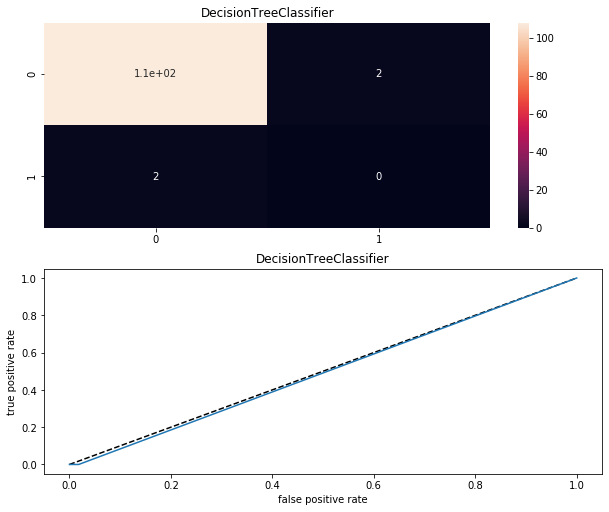




**************** KNeighborsClassifie ****************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


ACCURACY SCORE IS =  0.9732142857142857


CROSS_VAL_SCORE =  0.9839285714285714


ROC_AUC_SCORE =  0.4954545454545455


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.00      0.00      0.00         2

    accuracy                           0.97       112
   macro avg       0.49      0.50      0.49       112
weighted avg       0.96      0.97      0.97       112



CONFUSION MATRIX [[109   1]
 [  2   0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


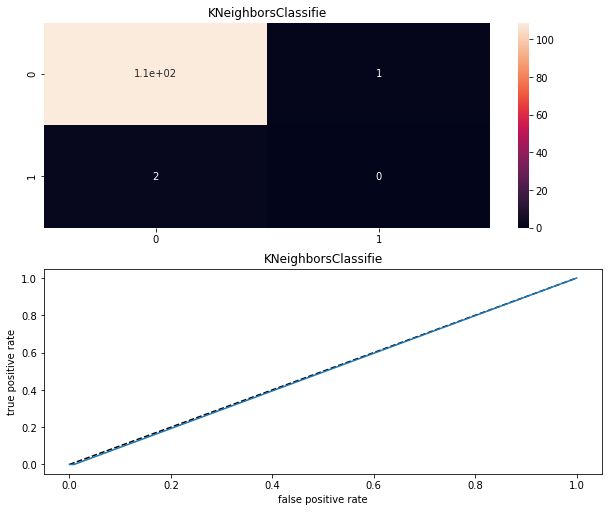

In [92]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS= accuracy_score(y_test,pred)
    print('ACCURACY SCORE IS = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('CONFUSION MATRIX',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(name)
    plt.show()
    print('\n\n')

### Result for 2.2 Patient addmited to semi-intensive unit (1=yes, 0=no)

In [93]:
result=pd.DataFrame({'Model': Model,'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

Model  Accuracy_score  Cross_val_score  Roc_auc_curve
0      LogisticRegression       97.321429        98.925325      49.545455
1              GaussianNB       96.428571        95.168831      73.636364
2                     SVC       98.214286        98.928571      50.000000
3  DecisionTreeClassifier       96.428571        96.782468      49.090909
4     KNeighborsClassifie       97.321429        98.392857      49.545455

### Choosing a Model:

I am goin to choose the logistic regression model for predicting Patient addmited to semi-intensive unit (1=yes, 0=no) from the confirmed case as the accuracy score is highest among all other models tested above which is 97.32% and cross val score is also highest whicH is 98.92%.

### Saving the file:

In [94]:
joblib.dump(LOR,'Project_20_Brazil_Covid19_2.2_Analysis.obj')

['Project_20_Brazil_Covid19_2.2_Analysis.obj']

In [95]:
#loading back the model:
model=joblib.load('Project_20_Brazil_Covid19_2.2_Analysis.obj')


In [96]:
#Pridicting x_test logistic regression = LOR
LOR.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

## Changing Column:

# 2.3

Bringing Patient addmited to intensive care unit (1=yes, 0=no) column at the 1st column, in-order to ease of the calculation.

In [97]:
df5=df3.copy()
df5

Patient addmited to regular ward (1=yes, 0=no)  Patient age quantile  \
67                                                 0                    17   
284                                                1                     8   
513                                                0                     2   
568                                                0                    12   
676                                                0                     7   
...                                              ...                   ...   
5632                                               0                     8   
5633                                               0                    14   
5634                                               0                     7   
5639                                               0                    13   
5643                                               0                    11   

      SARS-Cov-2 exam result  \
67                         1   
284                        1   
513                        1   
568                        1   
676                        1   
...                      ...   
5632                       1   
5633                       1   
5634                       1   
5639                       1   
5643                       1   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                    0       
284                                                   0       
513                                                   0       
568                                                   0       
676                                                   0       
...                                                 ...       
5632                                                  0       
5633                                                  0       
5634                                                  0       
5639                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0     -999.000000   
284                                                   0     -999.000000   
513                                                   0     -999.000000   
568                                                   0        0.991838   
676                                                   0     -999.000000   
...                                                 ...             ...   
5632                                                  0     -999.000000   
5633                                                  0     -999.000000   
5634                                                  0     -999.000000   
5639                                                  0     -999.000000   
5643                                                  0        0.694287   

      Serum Glucose  Respiratory Syncytial Virus  Mycoplasma pneumoniae  \
67           -999.0                            0                 -999.0   
284          -999.0                            1                 -999.0   
513          -999.0                            1                 -999.0   
568          -999.0                            1                 -999.0   
676          -999.0                            0                 -999.0   
...             ...                          ...                    ...   
5632         -999.0                            0                 -999.0   
5633         -999.0                            0                 -999.0   
5634         -999.0                            0                 -999.0   
5639         -999.0                            0                 -999.0   
5643         -999.0                            0                 -999.0   

            Urea  ...  Prothrombin time (PT), Activity  Vitamin B12  \
67   -999.000000  ...                           -999.0

In [98]:
mid = df5['Patient addmited to intensive care unit (1=yes, 0=no)']
df5.drop(labels=['Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1, inplace = True)
df5.insert(0, 'Patient addmited to intensive care unit (1=yes, 0=no)', mid)
df5.head()

Patient addmited to intensive care unit (1=yes, 0=no)  \
67                                                   0       
284                                                  0       
513                                                  0       
568                                                  0       
676                                                  0       

     Patient addmited to regular ward (1=yes, 0=no)  Patient age quantile  \
67                                                0                    17   
284                                               1                     8   
513                                               0                     2   
568                                               0                    12   
676                                               0                     7   

     SARS-Cov-2 exam result  \
67                        1   
284                       1   
513                       1   
568                       1   
676                       1   

     Patient addmited to semi-intensive unit (1=yes, 0=no)  Hematocrit  \
67                                                   0     -999.000000   
284                                                  0     -999.000000   
513                                                  0     -999.000000   
568                                                  0        0.991838   
676                                                  0     -999.000000   

     Serum Glucose  Respiratory Syncytial Virus  Mycoplasma pneumoniae  \
67          -999.0                            0                 -999.0   
284         -999.0                            1                 -999.0   
513         -999.0                            1                 -999.0   
568         -999.0                            1                 -999.0   
676         -999.0                            0                 -999.0   

           Urea  ...  Prothrombin time (PT), Activity  Vitamin B12  \
67  -999.000000  ...                           -999.0       -999.0   
284 -999.000000  ...                           -999.0       -999.0   
513 -999.000000  ...                           -999.0       -999.0   
568   -0.513909  ...                           -999.0       -999.0   
676 -999.000000  ...                           -999.0       -999.0   

     Creatine phosphokinase (CPK)   Ferritin  Arterial Lactic Acid  \
67                     -999.000000    -999.0                -999.0   
284                    -999.000000    -999.0                -999.0   
513                    -999.000000    -999.0                -999.0   
568                       0.125483    -999.0                -999.0   
676                    -999.000000    -999.0                -999.0   

     Lipase dosage  D-Dimer  Albumin  Arteiral Fio2  Phosphor  
67          -999.0   -999.0   -999.0         -999.0    -999.0  
284         -999.0   -999.0   -999.0         -999.0    -999.0  
513         -999.0   -999.0   -999.0         -999.0    -999.0  
568         -999.0   -999.0   -999.0         -999.0    -999.0  
676         -999.0   -999.0   -999.0         -999.0    -999.0  

[5 rows x 42 columns]

In [99]:
#Assigning X AND Y Variables:
x=df5.iloc[:,1:42]
x.shape
x.head(10)

Patient addmited to regular ward (1=yes, 0=no)  Patient age quantile  \
67                                                 0                    17   
284                                                1                     8   
513                                                0                     2   
568                                                0                    12   
676                                                0                     7   
884                                                1                     7   
1011                                               0                    17   
1108                                               0                     6   
1113                                               0                    15   
1129                                               0                    19   

      SARS-Cov-2 exam result  \
67                         1   
284                        1   
513                        1   
568                        1   
676                        1   
884                        1   
1011                       1   
1108                       1   
1113                       1   
1129                       1   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  Hematocrit  \
67                                                    0     -999.000000   
284                                                   0     -999.000000   
513                                                   0     -999.000000   
568                                                   0        0.991838   
676                                                   0     -999.000000   
884                                                   0       -0.495919   
1011                                                  0     -999.000000   
1108                                                  0       -0.312811   
1113                                                  0     -999.000000   
1129                                                  0     -999.000000   

      Serum Glucose  Respiratory Syncytial Virus  Mycoplasma pneumoniae  \
67      -999.000000                            0                 -999.0   
284     -999.000000                            1                 -999.0   
513     -999.000000                            1                 -999.0   
568     -999.000000                            1                 -999.0   
676     -999.000000                            0                 -999.0   
884       -0.928044                            1                 -999.0   
1011    -999.000000                            0                 -999.0   
1108      -0.110364                            1                 -999.0   
1113    -999.000000                            0                 -999.0   
1129    -999.000000                            0                 -999.0   

            Urea  Proteina C reativa mg/dL  ...  \
67   -999.000000               -999.000000  ...   
284  -999.000000               -999.000000  ...   
513  -999.000000               -999.000000  ...   
568    -0.513909               -999.000000  ...   
676  -999.000000               -999.000000  ...   
884     0.974759                 -0.247246  ...   
1011 -999.000000               -999.000000  ...   
1108    0.304858                 -0.479726  ...   
1113 -999.000000               -999.000000  ...   
1129 -999.000000               -999.000000  ...   

      Prothrombin time (PT), Activity  Vitamin B12  \
67                             -999.0       -999.0   
284                            -999.0       -999.0   
513                            -999.0       -999.0   
568                            -999.0       -999.0   
676                            -999.0       -999.0   
884                            -999.0       -999.0   
1011                           -999.0       -999.0   
1108                           -999.0       -999.0   
1113                           -999.0       -999.0   
1129                           -999.0   

In [100]:
y=df5.iloc[:,0:1]
y.shape
y

Patient addmited to intensive care unit (1=yes, 0=no)
67                                                    0    
284                                                   0    
513                                                   0    
568                                                   0    
676                                                   0    
...                                                 ...    
5632                                                  0    
5633                                                  0    
5634                                                  0    
5639                                                  0    
5643                                                  0    

[558 rows x 1 columns]

In [101]:
#Standard Scaler:
#To bring all the values at the same scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_scaler = scaler.transform(x)
x = pd.DataFrame(df1_scaler)
x.head(10)

0         1    2         3         4         5         6    7   \
0 -0.262613  1.169569  0.0 -0.120605 -0.418015 -0.250713 -0.501120  0.0   
1  3.807887 -0.485892  0.0 -0.120605 -0.418015 -0.250713  1.995531  0.0   
2 -0.262613 -1.589532  0.0 -0.120605 -0.418015 -0.250713  1.995531  0.0   
3 -0.262613  0.249868  0.0 -0.120605  2.394347 -0.250713  1.995531  0.0   
4 -0.262613 -0.669832  0.0 -0.120605 -0.418015 -0.250713 -0.501120  0.0   
5  3.807887 -0.669832  0.0 -0.120605  2.390163  3.984865  1.995531  0.0   
6 -0.262613  1.169569  0.0 -0.120605 -0.418015 -0.250713 -0.501120  0.0   
7 -0.262613 -0.853772  0.0 -0.120605  2.390678  3.988335  1.995531  0.0   
8 -0.262613  0.801689  0.0 -0.120605 -0.418015 -0.250713 -0.501120  0.0   
9 -0.262613  1.537449  0.0 -0.120605 -0.418015 -0.250713 -0.501120  0.0   

         8         9   ...   31   32        33        34        35        36  \
0 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
1 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
2 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
3  2.907066 -0.378738  ...  0.0  0.0  4.824063 -0.059976 -0.154445 -0.073521   
4 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
5  2.911912  2.639055  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
6 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
7  2.909731  2.638353  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
8 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   
9 -0.343855 -0.378738  ...  0.0  0.0 -0.207342 -0.059976 -0.154445 -0.073521   

    37   38        39        40  
0  0.0  0.0 -0.128037 -0.042371  
1  0.0  0.0 -0.128037 -0.042371  
2  0.0  0.0 -0.128037 -0.042371  
3  0.0  0.0 -0.128037 -0.042371  
4  0.0  0.0 -0.128037 -0.042371  
5  0.0  0.0 -0.128037 -0.042371  
6  0.0  0.0 -0.128037 -0.042371  
7  0.0  0.0 -0.128037 -0.042371  
8  0.0  0.0 -0.128037 -0.042371  
9  0.0  0.0 -0.128037 -0.042371  

[10 rows x 41 columns]

### Model Testing:

1. Logistic Regression
2. Gaussian NB
3. SVC
4. Decision Tree Classifier
5. KNeighbors Classifier

In [102]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [ ]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

In [103]:
from sklearn.svm import SVC
LOR=LogisticRegression()
GNB=GaussianNB()
SVC=SVC()
DTC=DecisionTreeClassifier(random_state=10)
KNN=KNeighborsClassifier()

In [104]:
models= []
models.append(('LogisticRegression',LOR))
models.append(('GaussianNB',GNB))
models.append(('SVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KNeighborsClassifie',KNN))

**************** LogisticRegression ****************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY SCORE IS =  0.9821428571428571


CROSS_VAL_SCORE =  0.9856818181818182


ROC_AUC_SCORE =  0.7454545454545455


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.99      0.99      0.99       110
           1       0.50      0.50      0.50         2

    accuracy                           0.98       112
   macro avg       0.75      0.75      0.75       112
weighted avg       0.98      0.98      0.98       112



CONFUSION MATRIX [[109   1]
 [  1   1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


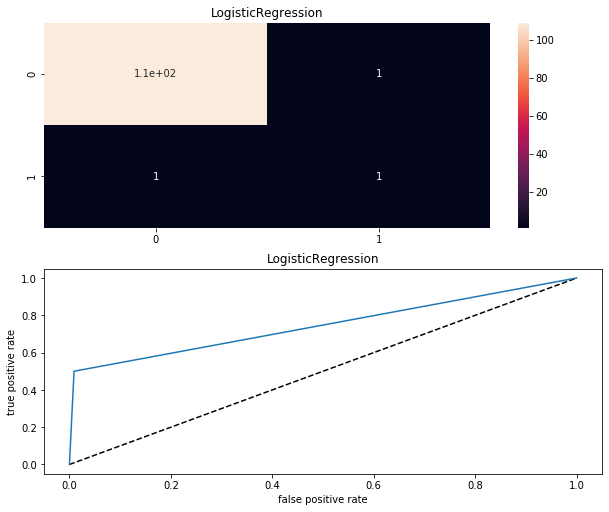




**************** GaussianNB ****************


GaussianNB(priors=None, var_smoothing=1e-09)


ACCURACY SCORE IS =  0.9464285714285714


CROSS_VAL_SCORE =  0.9516883116883117


ROC_AUC_SCORE =  0.9727272727272727


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       1.00      0.95      0.97       110
           1       0.25      1.00      0.40         2

    accuracy                           0.95       112
   macro avg       0.62      0.97      0.69       112
weighted avg       0.99      0.95      0.96       112



CONFUSION MATRIX [[104   6]
 [  0   2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


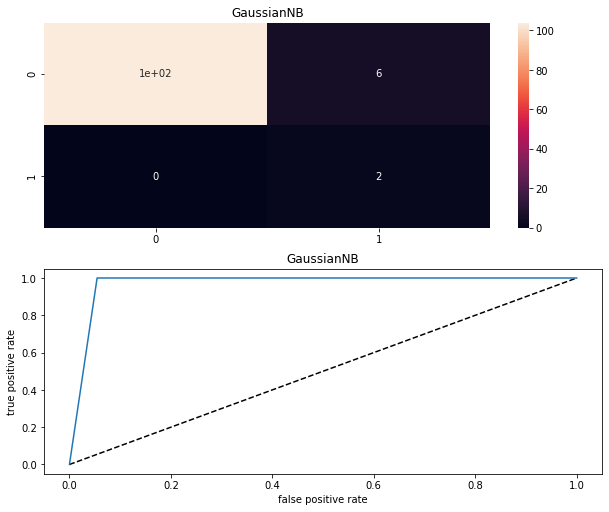




**************** SVC ****************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


ACCURACY SCORE IS =  0.9821428571428571


CROSS_VAL_SCORE =  0.9857142857142858


ROC_AUC_SCORE =  0.5


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.98      1.00      0.99       110
           1       0.00      0.00      0.00         2

    accuracy                           0.98       112
   macro avg       0.49      0.50      0.50       112
weighted avg       0.96      0.98      0.97       112



CONFUSION MATRIX [[110   0]
 [  2   0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


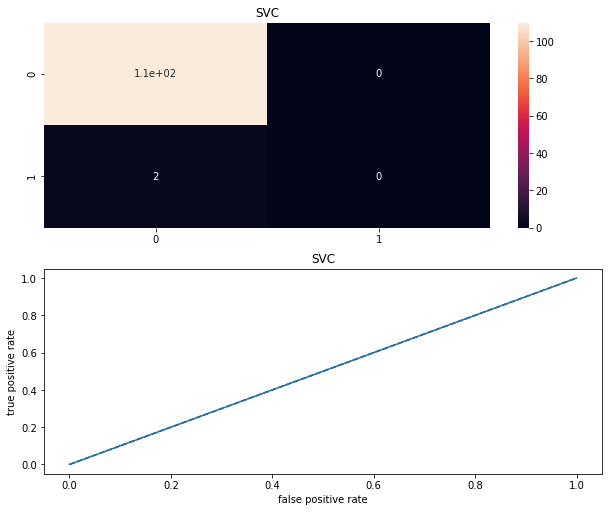




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


ACCURACY SCORE IS =  0.9732142857142857


CROSS_VAL_SCORE =  0.9678571428571427


ROC_AUC_SCORE =  0.4954545454545455


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.00      0.00      0.00         2

    accuracy                           0.97       112
   macro avg       0.49      0.50      0.49       112
weighted avg       0.96      0.97      0.97       112



CONFUSION MATRIX [[109   1]
 [  2   0

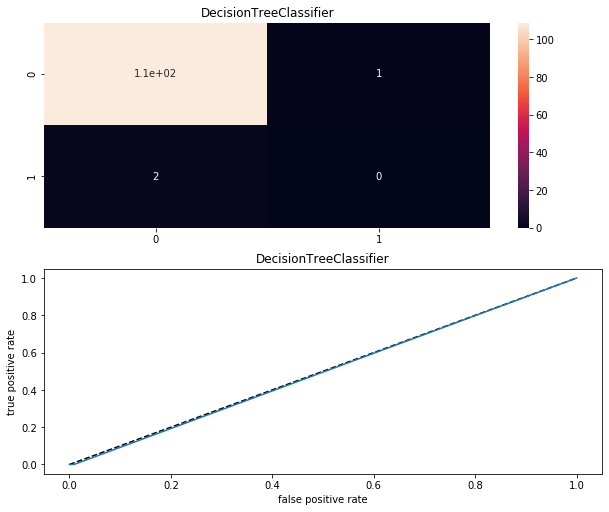




**************** KNeighborsClassifie ****************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


ACCURACY SCORE IS =  0.9821428571428571


CROSS_VAL_SCORE =  0.9857142857142858


ROC_AUC_SCORE =  0.5


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.98      1.00      0.99       110
           1       0.00      0.00      0.00         2

    accuracy                           0.98       112
   macro avg       0.49      0.50      0.50       112
weighted avg       0.96      0.98      0.97       112



CONFUSION MATRIX [[110   0]
 [  2   0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


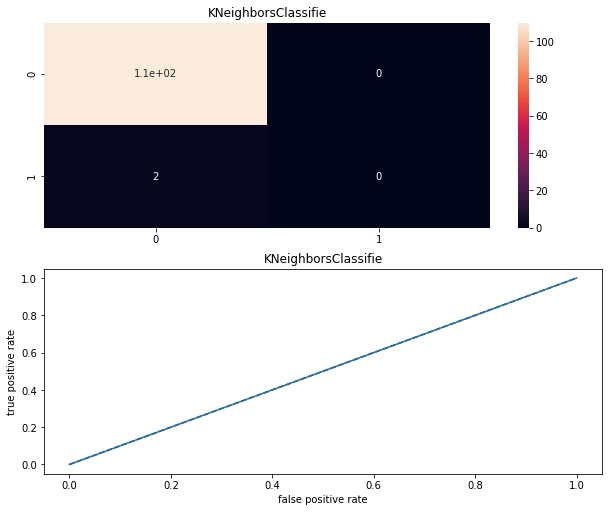

In [105]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS= accuracy_score(y_test,pred)
    print('ACCURACY SCORE IS = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('CONFUSION MATRIX',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(name)
    plt.show()
    print('\n\n')

### Result for 2.3 Patient addmited to intensive care unit (1=yes, 0=no)

In [107]:
result=pd.DataFrame({'Model': Model,'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

Model  Accuracy_score  Cross_val_score  Roc_auc_curve
0      LogisticRegression       98.214286        98.568182      74.545455
1              GaussianNB       94.642857        95.168831      97.272727
2                     SVC       98.214286        98.571429      50.000000
3  DecisionTreeClassifier       97.321429        96.785714      49.545455
4     KNeighborsClassifie       98.214286        98.571429      50.000000

### Choosing a Model:

I am goin to choose the logistic regression model for predicting Patient addmited to intensive care unit (1=yes, 0=no) from the confirmed case as the accuracy score is highest among all other models tested above which is 98.21% and cross val score is high which is 98.56% , Roc_auc_curv is also highest among svc and knn models which is 74.54%

### Saving the file:

In [108]:
joblib.dump(LOR,'Project_20_Brazil_Covid19_2.3_Analysis.obj')

['Project_20_Brazil_Covid19_2.3_Analysis.obj']

In [109]:
#loading back the model:
model=joblib.load('Project_20_Brazil_Covid19_2.3_Analysis.obj')

In [110]:
#Pridicting x_test logistic regression = LOR
LOR.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])